In [2]:
# Verifica√ß√£o e instala√ß√£o de depend√™ncias
import sys
import subprocess
import pickle

def check_and_install_packages():
    """
    Verifica e instala pacotes necess√°rios se houver problemas de compatibilidade
    """
    required_packages = [
        'numpy>=1.24.0',
        'pandas>=1.5.0',
        'scikit-learn>=1.3.0',
        'matplotlib>=3.7.0',
        'seaborn>=0.12.0'
    ]
    
    for package in required_packages:
        try:
            if 'numpy' in package:
                import numpy as np
                print(f"‚úÖ NumPy version: {np.__version__}")
            elif 'pandas' in package:
                import pandas as pd
                print(f"‚úÖ Pandas version: {pd.__version__}")
            elif 'scikit-learn' in package:
                import sklearn
                print(f"‚úÖ Scikit-learn version: {sklearn.__version__}")
            elif 'matplotlib' in package:
                import matplotlib
                print(f"‚úÖ Matplotlib version: {matplotlib.__version__}")
            elif 'seaborn' in package:
                import seaborn as sns
                print(f"‚úÖ Seaborn version: {sns.__version__}")
        except ImportError as e:
            print(f"‚ùå Erro ao importar {package}: {e}")
            print(f"üîÑ Instalando {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
    print("üéâ Todas as depend√™ncias est√£o funcionando corretamente!")

# Executar verifica√ß√£o
try:
    check_and_install_packages()
except Exception as e:
    print(f"‚ö†Ô∏è Problema detectado: {e}")
    print("üîÑ Reinstalando NumPy especificamente...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--force-reinstall", "numpy==1.24.4"])

‚úÖ NumPy version: 2.3.3
‚úÖ Pandas version: 2.3.3
‚úÖ Scikit-learn version: 1.7.2
‚úÖ Matplotlib version: 3.10.7
‚úÖ Seaborn version: 0.13.2
üéâ Todas as depend√™ncias est√£o funcionando corretamente!


# An√°lise de Ganho de Informa√ß√£o e Mutual Information
O ganho de informa√ß√£o √© realizado no dataset de treino
Este notebook calcula o ganho de informa√ß√£o e mutual information para o dataset SVM.
- **Ganho de Informa√ß√£o**: Mede a redu√ß√£o na entropia ap√≥s dividir o dataset com base em um atributo
- **Mutual Information**: Mede a depend√™ncia m√∫tua entre duas vari√°veis

In [3]:
# Importa√ß√£o das bibliotecas necess√°rias
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import warnings
import pickle
import lib_analise 
warnings.filterwarnings('ignore')

In [4]:
#Vari√°veis globais


info_modelo = lib_analise.get_info_modelo()  # para garantir que a fun√ß√£o est√° carregada da
nome_dataset = info_modelo['nome_dataset']
arq_dataset_csv = info_modelo['parametros']['arq_dataset_csv']
arq_dataset_pkl = info_modelo['parametros']['arq_dataset_pkl']

config = {}
config['drop_campos_altamente_correlacionados'] = True




In [5]:
# datasets = lib_analise.get_dataset_analise(analise_ganho_de_informacao=True)

In [24]:
# Carregar os datasets de teste, treino e valida√ß√£o do arquivo pickle
print("üìÇ Carregando datasets preprocessados...")


import pickle
import numpy as np
import pandas as pd

# Verificar se o arquivo existe
import os
if not os.path.exists(arq_dataset_pkl):
    print(f"‚ùå Arquivo pickle n√£o encontrado: {arq_dataset_pkl}")
    print("üîÑ Executando carregamento direto do CSV...")
    # Carregar diretamente do CSV se o pickle n√£o existir
    raise FileNotFoundError("Pickle n√£o encontrado")

# Carregar o arquivo pickle


datasets = lib_analise.get_dataset_analise(analise_ganho_de_informacao=False)
# Extrair os datasets
X_train = datasets['X_train']
X_test = datasets['X_test']
X_val = datasets['X_val']
y_train = datasets['y_train']
y_test = datasets['y_test']
y_val = datasets['y_val']
X_train_scaled = datasets['X_train_scaled']
X_test_scaled = datasets['X_test_scaled']
X_val_scaled = datasets['X_val_scaled']
classes_mapping = datasets['classes_mapping']
features_ganho_informacao  = datasets['features_ganho_informacao']

print("‚úÖ Datasets carregados com sucesso!")
print(f"   ‚Ä¢ X_train shape: {X_train.shape}")
print(f"   ‚Ä¢ X_test shape: {X_test.shape}")
print(f"   ‚Ä¢ X_val shape: {X_val.shape}")
print(f"   ‚Ä¢ Classes mapping: {classes_mapping}")

# Usar os dados preprocessados para an√°lise
print("\nüìä Usando dados preprocessados para an√°lise de ganho de informa√ß√£o...")



üìÇ Carregando datasets preprocessados...
X_train_scaled.shape (32259, 122)
X_test_scaled.shape (24194, 122)
X_val_scaled.shape (24195, 122)
X_train.shape (32259, 107)
X_test.shape (24194, 107)
X_val.shape (24195, 107)
‚úÖ Datasets carregados com sucesso!
   ‚Ä¢ X_train shape: (32259, 107)
   ‚Ä¢ X_test shape: (24194, 107)
   ‚Ä¢ X_val shape: (24195, 107)
   ‚Ä¢ Classes mapping: {'interf': np.int64(0), 'normal': np.int64(1)}

üìä Usando dados preprocessados para an√°lise de ganho de informa√ß√£o...


Features altamente correlacionadas (>0.95): ['mean_os_mem_pgpgin', 'mean_os_mem_pgpgout', 'mean_os_net_packets_recv', 'mean_process_cpu_children_user', 'mean_process_disk_read_count', 'mean_process_disk_write_bytes', 'mean_process_net_tx_drop', 'mean_process_net_tx_packets', 'mean_container_disk_8:0_sync', 'mean_container_disk_8:0_total', 'mean_container_disk_8:0_write', 'mean_container_mem_pgpgin', 'mean_container_mem_rss', 'mean_container_net_rx_drop', 'mean_container_net_tx_drop']


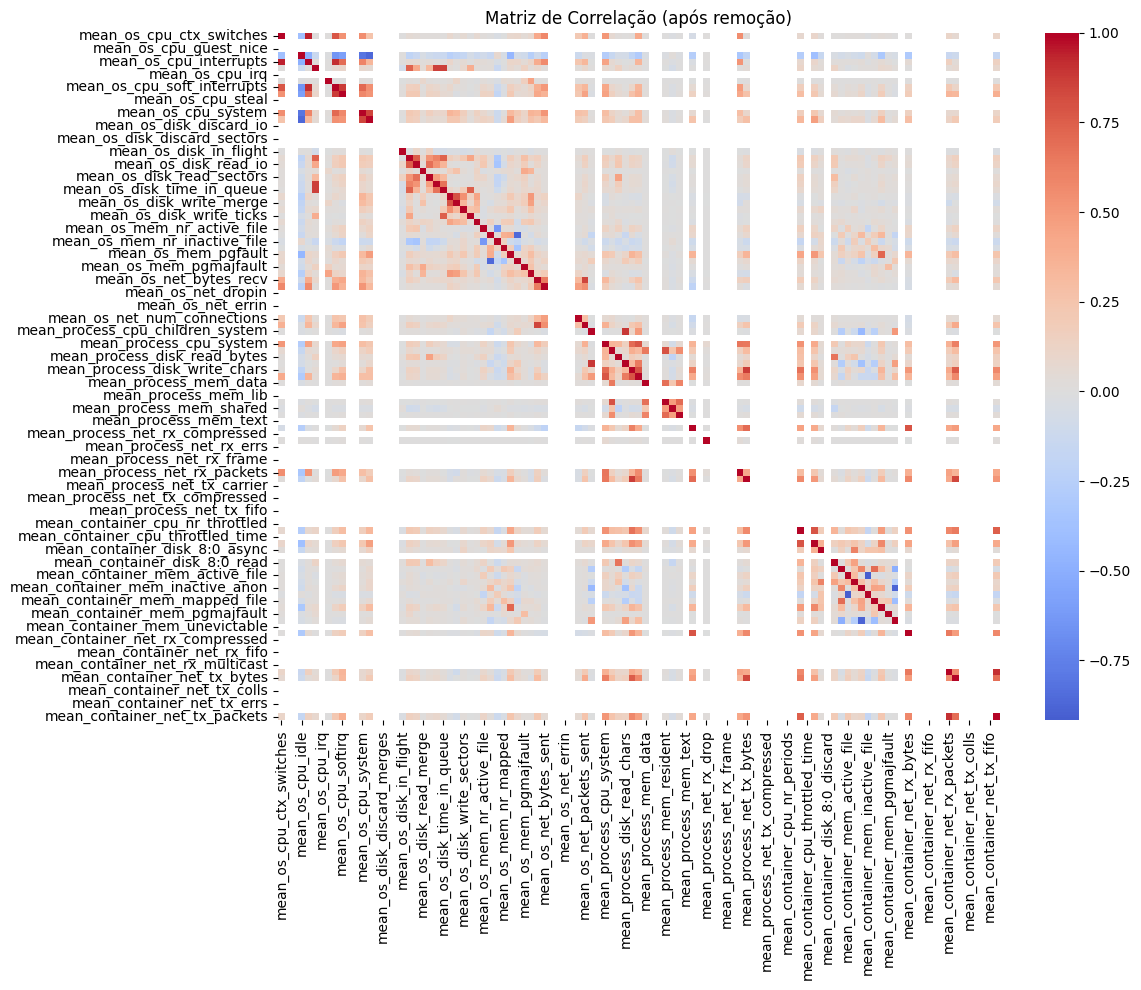

122
15
107
107


In [7]:
# Identifica campos altamente correlacionados
import lib_analise
def drop_campos_altamente_correlacionados(X, threshold=0.95):
    """
    Remove features altamente correlacionadas com base em um limiar.
    """
    correlation_matrix = X.corr().abs()

    # Encontrar pares com alta correla√ß√£o
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )

    # Features para remover (correla√ß√£o > 0.95)
    # avaliar se √© interessante fazer um loop junto com o gridsearch para avaliar o melhor threshold
    to_drop = [column for column in upper_triangle.columns 
            if any(upper_triangle[column] > 0.95)]

    print(f"Features altamente correlacionadas (>{threshold}): {to_drop}")

    # Remover
    X_no_corr = X.drop(columns=to_drop)

    # Visualizar matriz de correla√ß√£o
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_no_corr.corr(), annot=False, cmap='coolwarm', center=0)
    plt.title('Matriz de Correla√ß√£o (ap√≥s remo√ß√£o)')
    plt.tight_layout()
    plt.show()
    return to_drop

if config.get('drop_campos_altamente_correlacionados', True):
    drop_feature = drop_campos_altamente_correlacionados(X_train)
    features_ganho_informacao  = datasets['features_ganho_informacao']
    novas_features = [f for f in features_ganho_informacao if f not in drop_feature]
    print(len(X_train.columns))
    print(len(drop_feature))
    print(len(novas_features))
    datasets = lib_analise.atualizar_features_dataset_analise(datasets = datasets,features = novas_features)
    X_train = datasets['X_train']
    print(len(X_train.columns))
    X_test = datasets['X_test']
    X_val = datasets['X_val']
    

In [8]:
# Verifica√ß√£o dos dados carregados
print("üìä Verificando dados preprocessados carregados...")

print(f"\nüîç Informa√ß√µes dos dados de treinamento:")
print(f"   ‚Ä¢ Tipo de X_train: {type(X_train)}")
print(f"   ‚Ä¢ Tipo de y_train: {type(y_train)}")

if hasattr(X_train, 'shape'):
    print(f"   ‚Ä¢ Dimens√µes X_train: {X_train.shape}")
if hasattr(y_train, 'shape'):
    print(f"   ‚Ä¢ Dimens√µes y_train: {y_train.shape}")
elif hasattr(y_train, '__len__'):
    print(f"   ‚Ä¢ Tamanho y_train: {len(y_train)}")

print(f"\nüìã Estat√≠sticas b√°sicas:")
if isinstance(X_train, pd.DataFrame):
    print(f"   ‚Ä¢ Colunas em X_train: {len(X_train.columns)}")
    print(f"   ‚Ä¢ Primeiras colunas: {list(X_train.columns[:5])}")
elif isinstance(X_train, np.ndarray):
    print(f"   ‚Ä¢ X_train √© um numpy array com {X_train.shape[1]} features")
    
print(f"   ‚Ä¢ Classes √∫nicas em y_train: {np.unique(y_train)}")
print(f"   ‚Ä¢ Balanceamento das classes:")

unique, counts = np.unique(y_train, return_counts=True)
for class_val, count in zip(unique, counts):
    percentage = (count / len(y_train)) * 100
    print(f"     - Classe {class_val}: {count:,} amostras ({percentage:.1f}%)")

print("\n‚úÖ Dados prontos para an√°lise de ganho de informa√ß√£o!")

üìä Verificando dados preprocessados carregados...

üîç Informa√ß√µes dos dados de treinamento:
   ‚Ä¢ Tipo de X_train: <class 'pandas.core.frame.DataFrame'>
   ‚Ä¢ Tipo de y_train: <class 'numpy.ndarray'>
   ‚Ä¢ Dimens√µes X_train: (32259, 107)
   ‚Ä¢ Dimens√µes y_train: (32259,)

üìã Estat√≠sticas b√°sicas:
   ‚Ä¢ Colunas em X_train: 107
   ‚Ä¢ Primeiras colunas: ['mean_os_cpu_ctx_switches', 'mean_os_cpu_guest', 'mean_os_cpu_guest_nice', 'mean_os_cpu_idle', 'mean_os_cpu_interrupts']
   ‚Ä¢ Classes √∫nicas em y_train: [0 1]
   ‚Ä¢ Balanceamento das classes:
     - Classe 0: 18,264 amostras (56.6%)
     - Classe 1: 13,995 amostras (43.4%)

‚úÖ Dados prontos para an√°lise de ganho de informa√ß√£o!


## Fun√ß√µes para C√°lculo de Ganho de Informa√ß√£o

O ganho de informa√ß√£o √© calculado como:
**IG(S, A) = H(S) - H(S|A)**

Onde:
- H(S) √© a entropia do conjunto original
- H(S|A) √© a entropia condicional ap√≥s a divis√£o pelo atributo A

In [9]:
def calculate_entropy(y):
    """
    Calcula a entropia de um vetor de r√≥tulos
    """
    if len(y) == 0:
        return 0
    
    # Conta a frequ√™ncia de cada classe
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Calcula a entropia
    entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    return entropy_value

def calculate_information_gain(X_feature, y):
    """
    Calcula o ganho de informa√ß√£o para um atributo espec√≠fico
    """
    # Entropia total do conjunto
    total_entropy = calculate_entropy(y)
    
    # Valores √∫nicos do atributo
    unique_values = np.unique(X_feature)
    
    # Entropia condicional
    weighted_entropy = 0
    for value in unique_values:
        # √çndices onde o atributo tem esse valor
        indices = X_feature == value
        subset_y = y[indices]
        
        # Peso da subdivis√£o
        weight = len(subset_y) / len(y)
        
        # Entropia da subdivis√£o
        subset_entropy = calculate_entropy(subset_y)
        
        # Adiciona √† entropia ponderada
        weighted_entropy += weight * subset_entropy
    
    # Ganho de informa√ß√£o
    information_gain = total_entropy - weighted_entropy
    return information_gain

def calculate_information_gain_ratio(X_feature, y):
    """
    Calcula a raz√£o do ganho de informa√ß√£o (Information Gain Ratio)
    """
    ig = calculate_information_gain(X_feature, y)
    
    # Entropia intr√≠nseca do atributo
    unique_values, counts = np.unique(X_feature, return_counts=True)
    probabilities = counts / len(X_feature)
    intrinsic_entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    
    # Evita divis√£o por zero
    if intrinsic_entropy == 0:
        return 0
    
    return ig / intrinsic_entropy

In [10]:
# Prepara√ß√£o dos dados
print("Preparando os dados...")

# Usar dados preprocessados j√° carregados
# X_train e y_train j√° est√£o dispon√≠veis do carregamento do pickle
print("Usando dados preprocessados do arquivo pickle...")

# Verificar tipos de dados dispon√≠veis
print(f"Tipo de X_train: {type(X_train)}")
print(f"Tipo de y_train: {type(y_train)}")

# Converter para DataFrame se necess√°rio para an√°lise
if isinstance(X_train, np.ndarray):
    print("Convertendo X_train (numpy array) para DataFrame...")
    X = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
else:
    X = X_train.copy()

# Usar y_train diretamente
y = y_train.copy()

print(f"\nShape das features: {X.shape}")
print(f"Shape do target: {y.shape}")

# Verificar valores √∫nicos no target
if hasattr(y, 'nunique'):
    print(f"Valores √∫nicos no target: {y.nunique()}")
    print(f"Distribui√ß√£o do target:\n{y.value_counts()}")
else:
    unique_values, counts = np.unique(y, return_counts=True)
    print(f"Valores √∫nicos no target: {len(unique_values)}")
    print(f"Distribui√ß√£o do target:")
    for val, count in zip(unique_values, counts):
        print(f"  {val}: {count}")

print("\n‚úÖ Dados preparados para an√°lise de ganho de informa√ß√£o!")

Preparando os dados...
Usando dados preprocessados do arquivo pickle...
Tipo de X_train: <class 'pandas.core.frame.DataFrame'>
Tipo de y_train: <class 'numpy.ndarray'>

Shape das features: (32259, 107)
Shape do target: (32259,)
Valores √∫nicos no target: 2
Distribui√ß√£o do target:
  0: 18264
  1: 13995

‚úÖ Dados preparados para an√°lise de ganho de informa√ß√£o!


## C√°lculo do Ganho de Informa√ß√£o

Agora vamos calcular o ganho de informa√ß√£o para cada feature em rela√ß√£o √† vari√°vel alvo.

In [25]:
# C√°lculo do ganho de informa√ß√£o para cada feature
print("Calculando ganho de informa√ß√£o...")

# Para features cont√≠nuas, vamos discretiz√°-las primeiro
def discretize_continuous_features(X, n_bins=10):
    """
    Discretiza features cont√≠nuas em bins
    """
    X_discrete = X.copy()
    
    for column in X.columns:
        if X[column].dtype in ['float64', 'int64'] and X[column].nunique() > 20:
            # Discretiza em bins
            X_discrete[column] = pd.cut(X[column], bins=n_bins, labels=False)
    
    return X_discrete

# Discretiza as features se necess√°rio
X_discrete = discretize_continuous_features(X)

# Calcula o ganho de informa√ß√£o para cada feature
information_gains = {}
information_gain_ratios = {}

print(f"Processando {len(X_discrete.columns)} features...")

for i, column in enumerate(X_discrete.columns):
    try:
        # Remove valores NaN se houver
        if isinstance(X_discrete[column], pd.Series):
            mask = ~pd.isna(X_discrete[column])
        else:
            mask = ~np.isnan(X_discrete[column])
        
        # Para y, verificar se √© pandas Series ou numpy array
        if isinstance(y, pd.Series):
            mask = mask & ~pd.isna(y)
            y_clean = y[mask].values if hasattr(y[mask], 'values') else y[mask]
        else:
            # y √© numpy array
            if len(y.shape) > 0:
                mask = mask & ~np.isnan(y) if y.dtype.kind == 'f' else mask
            y_clean = y[mask]
        
        # Para X_discrete[column]
        feature_clean = X_discrete[column][mask].values if hasattr(X_discrete[column][mask], 'values') else X_discrete[column][mask]
        
        if len(feature_clean) > 0 and len(y_clean) > 0:
            ig = calculate_information_gain(feature_clean, y_clean)
            igr = calculate_information_gain_ratio(feature_clean, y_clean)
            
            information_gains[column] = ig
            information_gain_ratios[column] = igr
        else:
            print(f"   ‚ö†Ô∏è Feature {column} ignorada (dados insuficientes)")
            
        # Progress indicator
        if (i + 1) % 50 == 0:
            print(f"   Processadas {i + 1}/{len(X_discrete.columns)} features...")
            
    except Exception as e:
        print(f"   ‚ùå Erro na feature {column}: {e}")
        continue

print(f"\n‚úÖ Processamento conclu√≠do!")
print(f"   ‚Ä¢ Features processadas com sucesso: {len(information_gains)}")
print(f"   ‚Ä¢ Features com erro: {len(X_discrete.columns) - len(information_gains)}")

# Cria DataFrame com os resultados
if information_gains:
    ig_results = pd.DataFrame({
        'Feature': list(information_gains.keys()),
        'Information_Gain': list(information_gains.values()),
        'Information_Gain_Ratio': list(information_gain_ratios.values())
    })
    
    # Ordena por ganho de informa√ß√£o
    ig_results = ig_results.sort_values('Information_Gain', ascending=False)
    
    print("\nGanho de Informa√ß√£o por Feature (Top 15):")
    print(ig_results.head(15))
else:
    print("‚ùå Nenhuma feature foi processada com sucesso!")

Calculando ganho de informa√ß√£o...
Processando 107 features...
   Processadas 50/107 features...
   Processadas 100/107 features...

‚úÖ Processamento conclu√≠do!
   ‚Ä¢ Features processadas com sucesso: 107
   ‚Ä¢ Features com erro: 0

Ganho de Informa√ß√£o por Feature (Top 15):
                           Feature  Information_Gain  Information_Gain_Ratio
39          mean_os_net_bytes_sent          0.607395                0.228048
45        mean_os_net_packets_sent          0.412268                0.168397
4           mean_os_cpu_interrupts          0.210774                0.096086
0         mean_os_cpu_ctx_switches          0.187970                0.126176
8      mean_os_cpu_soft_interrupts          0.186976                0.081010
9              mean_os_cpu_softirq          0.135683                0.066583
12              mean_os_cpu_system          0.133248                0.139788
3                 mean_os_cpu_idle          0.122978                0.070310
13                mean_os

## C√°lculo do Mutual Information

O Mutual Information mede a depend√™ncia estat√≠stica entre duas vari√°veis. Vamos usar a implementa√ß√£o do scikit-learn.

In [26]:
# C√°lculo do Mutual Information usando scikit-learn
print("Calculando Mutual Information...")

# Prepara os dados para o mutual information
# Remove valores NaN
mask = ~(X.isna().any(axis=1) | pd.isna(y))
X_clean = X[mask]
y_clean = y[mask]

# Para features categ√≥ricas, usa mutual_info_classif diretamente
# Para features cont√≠nuas, tamb√©m funciona bem
try:
    # Calcula mutual information
    mi_scores = mutual_info_classif(X_clean, y_clean, random_state=42)
    
    # Cria DataFrame com os resultados
    mi_results = pd.DataFrame({
        'Feature': X_clean.columns,
        'Mutual_Information': mi_scores
    })
    
    # Ordena por mutual information
    mi_results = mi_results.sort_values('Mutual_Information', ascending=False)
    
    print("\nMutual Information por Feature (Top 15):")
    print(mi_results.head(15))
    
except Exception as e:
    print(f"Erro no c√°lculo do Mutual Information: {e}")
    print("Tentando com encoding das vari√°veis categ√≥ricas...")
    
    # Se houver erro, tenta fazer encoding das vari√°veis categ√≥ricas
    X_encoded = X_clean.copy()
    label_encoders = {}
    
    for column in X_encoded.columns:
        if X_encoded[column].dtype == 'object':
            le = LabelEncoder()
            X_encoded[column] = le.fit_transform(X_encoded[column].astype(str))
            label_encoders[column] = le
    
    # Tenta novamente
    mi_scores = mutual_info_classif(X_encoded, y_clean, random_state=42)
    
    mi_results = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Mutual_Information': mi_scores
    })
    
    mi_results = mi_results.sort_values('Mutual_Information', ascending=False)
    
    print("\nMutual Information por Feature (Top 15):")
    print(mi_results.head(15))

Calculando Mutual Information...

Mutual Information por Feature (Top 15):
                          Feature  Mutual_Information
39         mean_os_net_bytes_sent            0.657883
44    mean_os_net_num_connections            0.529928
48        mean_process_cpu_system            0.401139
49          mean_process_cpu_user            0.363641
53  mean_process_disk_write_count            0.338784
51   mean_process_disk_read_chars            0.314630
45       mean_os_net_packets_sent            0.287810
38         mean_os_net_bytes_recv            0.270781
52  mean_process_disk_write_chars            0.246426
61      mean_process_net_rx_bytes            0.239660
85       mean_container_mem_cache            0.228949
12             mean_os_cpu_system            0.212864
0        mean_os_cpu_ctx_switches            0.194604
4          mean_os_cpu_interrupts            0.187693
69      mean_process_net_tx_bytes            0.185554


## Compara√ß√£o e Visualiza√ß√£o dos Resultados

## Sele√ß√£o de Features por Thresholds

Agora vamos definir thresholds (limites) para selecionar as features mais informativas com base nos valores de Information Gain e Mutual Information calculados.

In [27]:
# Defini√ß√£o de Estrat√©gias de Sele√ß√£o de Features
print("üéØ DEFININDO ESTRAT√âGIAS DE SELE√á√ÉO DE FEATURES")
print("=" * 70)

# Verificar se os resultados necess√°rios existem
if 'ig_results' not in locals() or 'mi_results' not in locals():
    print("‚ùå Erro: Resultados de IG e MI n√£o encontrados!")
    print("   Execute primeiro as c√©lulas de c√°lculo de Information Gain e Mutual Information")
else:
    print("‚úÖ Resultados de IG e MI encontrados!")
    
    # Calcular estat√≠sticas para diferentes estrat√©gias
    ig_stats = ig_results['Information_Gain'].describe()
    mi_stats = mi_results['Mutual_Information'].describe()
    
    print(f"\nüìä ESTAT√çSTICAS DO INFORMATION GAIN:")
    print(f"   ‚Ä¢ M√©dia: {ig_stats['mean']:.6f}")
    print(f"   ‚Ä¢ Mediana: {ig_stats['50%']:.6f}")
    print(f"   ‚Ä¢ Q3 (75%): {ig_stats['75%']:.6f}")
    print(f"   ‚Ä¢ M√°ximo: {ig_stats['max']:.6f}")
    
    print(f"\nüìä ESTAT√çSTICAS DO MUTUAL INFORMATION:")
    print(f"   ‚Ä¢ M√©dia: {mi_stats['mean']:.6f}")
    print(f"   ‚Ä¢ Mediana: {mi_stats['50%']:.6f}")
    print(f"   ‚Ä¢ Q3 (75%): {mi_stats['75%']:.6f}")
    print(f"   ‚Ä¢ M√°ximo: {mi_stats['max']:.6f}")
    
    # Definir estrat√©gias de sele√ß√£o
    strategies = {
        'above_median': {
            'ig_threshold': ig_stats['50%'],  # Mediana
            'mi_threshold': mi_stats['50%'],  # Mediana
            'description': 'Features acima da mediana'
        },
        'above_mean': {
            'ig_threshold': ig_stats['mean'],  # M√©dia
            'mi_threshold': mi_stats['mean'],  # M√©dia
            'description': 'Features acima da m√©dia'
        },
        'top_25_percent': {
            'ig_threshold': ig_stats['75%'],   # Q3 (75¬∫ percentil)
            'mi_threshold': mi_stats['75%'],   # Q3 (75¬∫ percentil)
            'description': 'Top 25% das features (Q3)'
        }
    }
    
    print(f"\nüéØ ESTRAT√âGIAS DEFINIDAS:")
    for name, strategy in strategies.items():
        print(f"\n   üìå {name.upper()}:")
        print(f"      ‚Ä¢ Descri√ß√£o: {strategy['description']}")
        print(f"      ‚Ä¢ IG Threshold: {strategy['ig_threshold']:.6f}")
        print(f"      ‚Ä¢ MI Threshold: {strategy['mi_threshold']:.6f}")
    
    # Aplicar cada estrat√©gia e calcular features selecionadas
    selection_results = {}
    
    for strategy_name, strategy in strategies.items():
        # Features selecionadas apenas por Information Gain
        ig_selected = ig_results[
            ig_results['Information_Gain'] >= strategy['ig_threshold']
        ]['Feature'].tolist()
        
        # Features selecionadas apenas por Mutual Information
        mi_selected = mi_results[
            mi_results['Mutual_Information'] >= strategy['mi_threshold']
        ]['Feature'].tolist()
        
        # Features que atendem ambos os crit√©rios (interse√ß√£o)
        both_criteria = list(set(ig_selected) & set(mi_selected))
        
        # Features que atendem pelo menos um crit√©rio (uni√£o)
        either_criteria = list(set(ig_selected) | set(mi_selected))
        
        # Armazenar resultados
        selection_results[strategy_name] = {
            'ig_selected': ig_selected,
            'mi_selected': mi_selected,
            'both_criteria': both_criteria,
            'either_criteria': either_criteria
        }
        
        print(f"\n   üîç Resultados para {strategy_name.upper()}:")
        print(f"      ‚Ä¢ IG apenas: {len(ig_selected)} features")
        print(f"      ‚Ä¢ MI apenas: {len(mi_selected)} features") 
        print(f"      ‚Ä¢ Ambos crit√©rios: {len(both_criteria)} features")
        print(f"      ‚Ä¢ Qualquer crit√©rio: {len(either_criteria)} features")
    
    # Recomenda√ß√£o autom√°tica
    print(f"\nüèÜ RECOMENDA√á√ÉO AUTOM√ÅTICA:")
    print("   ‚Ä¢ Estrat√©gia recomendada: ABOVE_MEDIAN")
    print("   ‚Ä¢ Crit√©rio recomendado: Ambos (IG E MI)")
    
    recommended_strategy = 'above_median'
    recommended = selection_results[recommended_strategy]
    
    print(f"   ‚Ä¢ Features selecionadas: {len(recommended['both_criteria'])}")
    print(f"   ‚Ä¢ Redu√ß√£o: {(1 - len(recommended['both_criteria'])/len(ig_results))*100:.1f}%")
    
    # Mostrar algumas features selecionadas como exemplo
    if len(recommended['both_criteria']) > 0:
        print(f"\n   üìã Exemplo de features selecionadas (primeiras 10):")
        example_features = recommended['both_criteria'][:10]
        for i, feature in enumerate(example_features, 1):
            # Buscar scores para exibir
            ig_score = ig_results[ig_results['Feature'] == feature]['Information_Gain'].iloc[0]
            mi_score = mi_results[mi_results['Feature'] == feature]['Mutual_Information'].iloc[0]
            print(f"      {i:2d}. {feature:40s} | IG: {ig_score:.6f} | MI: {mi_score:.6f}")
        
        if len(recommended['both_criteria']) > 10:
            print(f"      ... e mais {len(recommended['both_criteria']) - 10} features")
    
    print(f"\n‚úÖ Vari√°veis criadas com sucesso:")
    print(f"   ‚Ä¢ strategies: Dicion√°rio com 3 estrat√©gias")
    print(f"   ‚Ä¢ selection_results: Resultados para cada estrat√©gia")
    print(f"   ‚Ä¢ recommended: Refer√™ncia para estrat√©gia recomendada")
    
    print(f"\nüí° Para usar os resultados:")
    print(f"   # Acessar features da estrat√©gia recomendada:")
    print(f"   selected_features = selection_results['above_median']['both_criteria']")
    print(f"   ")
    print(f"   # Acessar thresholds:")
    print(f"   ig_threshold = strategies['above_median']['ig_threshold']")
    print(f"   mi_threshold = strategies['above_median']['mi_threshold']")

üéØ DEFININDO ESTRAT√âGIAS DE SELE√á√ÉO DE FEATURES
‚úÖ Resultados de IG e MI encontrados!

üìä ESTAT√çSTICAS DO INFORMATION GAIN:
   ‚Ä¢ M√©dia: 0.022094
   ‚Ä¢ Mediana: 0.000534
   ‚Ä¢ Q3 (75%): 0.002544
   ‚Ä¢ M√°ximo: 0.607395

üìä ESTAT√çSTICAS DO MUTUAL INFORMATION:
   ‚Ä¢ M√©dia: 0.071265
   ‚Ä¢ Mediana: 0.008893
   ‚Ä¢ Q3 (75%): 0.121658
   ‚Ä¢ M√°ximo: 0.657883

üéØ ESTRAT√âGIAS DEFINIDAS:

   üìå ABOVE_MEDIAN:
      ‚Ä¢ Descri√ß√£o: Features acima da mediana
      ‚Ä¢ IG Threshold: 0.000534
      ‚Ä¢ MI Threshold: 0.008893

   üìå ABOVE_MEAN:
      ‚Ä¢ Descri√ß√£o: Features acima da m√©dia
      ‚Ä¢ IG Threshold: 0.022094
      ‚Ä¢ MI Threshold: 0.071265

   üìå TOP_25_PERCENT:
      ‚Ä¢ Descri√ß√£o: Top 25% das features (Q3)
      ‚Ä¢ IG Threshold: 0.002544
      ‚Ä¢ MI Threshold: 0.121658

   üîç Resultados para ABOVE_MEDIAN:
      ‚Ä¢ IG apenas: 54 features
      ‚Ä¢ MI apenas: 54 features
      ‚Ä¢ Ambos crit√©rios: 48 features
      ‚Ä¢ Qualquer crit√©rio: 60 fea

üìä Visualizando thresholds e permitindo sele√ß√£o customizada...
‚úÖ Combined_results j√° existe com 107 features


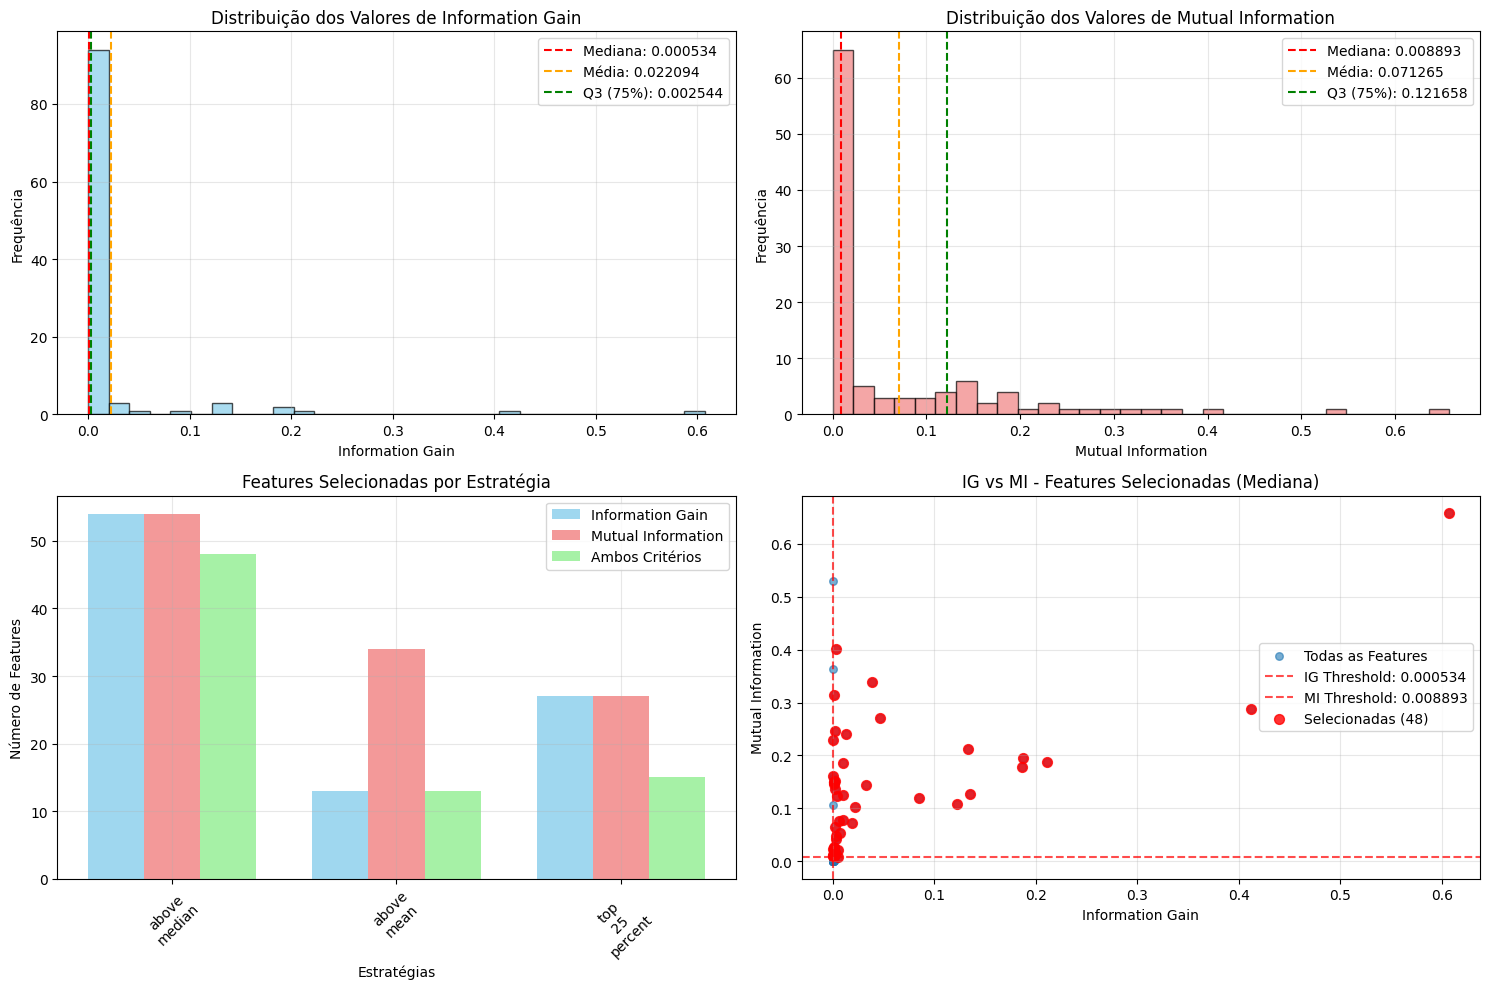


üîß SELE√á√ÉO CUSTOMIZADA DE THRESHOLDS
Para usar thresholds customizados, modifique os valores abaixo:

# Exemplo de uso:
custom_ig_threshold = 0.01  # Seu threshold para Information Gain
custom_mi_threshold = 0.01  # Seu threshold para Mutual Information

# Aplicar sele√ß√£o customizada:
custom_ig_selected = ig_results[ig_results['Information_Gain'] >= custom_ig_threshold]['Feature'].tolist()
custom_mi_selected = mi_results[mi_results['Mutual_Information'] >= custom_mi_threshold]['Feature'].tolist()
custom_both_criteria = list(set(custom_ig_selected) & set(custom_mi_selected))

print(f'Features selecionadas com thresholds customizados: {len(custom_both_criteria)}')

üìä INFORMA√á√ïES DO COMBINED_RESULTS:
   ‚Ä¢ Shape: (107, 4)
   ‚Ä¢ Colunas: ['Feature', 'Information_Gain', 'Information_Gain_Ratio', 'Mutual_Information']
   ‚Ä¢ Features √∫nicas: 107

   üìã Exemplo (primeiras 5 linhas):
                          Feature  Information_Gain  Information_Gain_Ratio  Mutual_Informatio

In [28]:
# Visualiza√ß√£o dos Thresholds e Sele√ß√£o Customizada
print("üìä Visualizando thresholds e permitindo sele√ß√£o customizada...")

# Verificar se os resultados existem
if 'ig_results' in locals() and 'mi_results' in locals():
    
    # Primeiro, criar combined_results se n√£o existir
    if 'combined_results' not in locals() or combined_results is None:
        print("üîÑ Criando combined_results...")
        try:
            # Merge dos resultados de IG e MI
            combined_results = ig_results.merge(
                mi_results, 
                on='Feature', 
                how='outer', 
                suffixes=('_IG', '_MI')
            )
            print(f"‚úÖ Combined_results criado com {len(combined_results)} features")
            
            # Calcular correla√ß√£o entre as m√©tricas
            if len(combined_results) > 1:
                correlation = combined_results['Information_Gain'].corr(
                    combined_results['Mutual_Information']
                )
                print(f"üìä Correla√ß√£o IG vs MI: {correlation:.4f}")
            
        except Exception as e:
            print(f"‚ùå Erro ao criar combined_results: {e}")
            print("   Usando DataFrames separados para visualiza√ß√£o")
            combined_results = None
    else:
        print(f"‚úÖ Combined_results j√° existe com {len(combined_results)} features")
    
    # Criar visualiza√ß√£o dos thresholds
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Subplot 1: Distribui√ß√£o do Information Gain com thresholds
    axes[0, 0].hist(ig_results['Information_Gain'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(strategies['above_median']['ig_threshold'], color='red', linestyle='--', 
                       label=f"Mediana: {strategies['above_median']['ig_threshold']:.6f}")
    axes[0, 0].axvline(strategies['above_mean']['ig_threshold'], color='orange', linestyle='--',
                       label=f"M√©dia: {strategies['above_mean']['ig_threshold']:.6f}")
    axes[0, 0].axvline(strategies['top_25_percent']['ig_threshold'], color='green', linestyle='--',
                       label=f"Q3 (75%): {strategies['top_25_percent']['ig_threshold']:.6f}")
    axes[0, 0].set_xlabel('Information Gain')
    axes[0, 0].set_ylabel('Frequ√™ncia')
    axes[0, 0].set_title('Distribui√ß√£o dos Valores de Information Gain')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Subplot 2: Distribui√ß√£o do Mutual Information com thresholds
    axes[0, 1].hist(mi_results['Mutual_Information'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].axvline(strategies['above_median']['mi_threshold'], color='red', linestyle='--',
                       label=f"Mediana: {strategies['above_median']['mi_threshold']:.6f}")
    axes[0, 1].axvline(strategies['above_mean']['mi_threshold'], color='orange', linestyle='--',
                       label=f"M√©dia: {strategies['above_mean']['mi_threshold']:.6f}")
    axes[0, 1].axvline(strategies['top_25_percent']['mi_threshold'], color='green', linestyle='--',
                       label=f"Q3 (75%): {strategies['top_25_percent']['mi_threshold']:.6f}")
    axes[0, 1].set_xlabel('Mutual Information')
    axes[0, 1].set_ylabel('Frequ√™ncia')
    axes[0, 1].set_title('Distribui√ß√£o dos Valores de Mutual Information')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Subplot 3: N√∫mero de features selecionadas por estrat√©gia
    strategy_names = list(strategies.keys())
    ig_counts = [len(selection_results[s]['ig_selected']) for s in strategy_names]
    mi_counts = [len(selection_results[s]['mi_selected']) for s in strategy_names]
    both_counts = [len(selection_results[s]['both_criteria']) for s in strategy_names]
    
    x = np.arange(len(strategy_names))
    width = 0.25
    
    axes[1, 0].bar(x - width, ig_counts, width, label='Information Gain', alpha=0.8, color='skyblue')
    axes[1, 0].bar(x, mi_counts, width, label='Mutual Information', alpha=0.8, color='lightcoral')
    axes[1, 0].bar(x + width, both_counts, width, label='Ambos Crit√©rios', alpha=0.8, color='lightgreen')
    
    axes[1, 0].set_xlabel('Estrat√©gias')
    axes[1, 0].set_ylabel('N√∫mero de Features')
    axes[1, 0].set_title('Features Selecionadas por Estrat√©gia')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([s.replace('_', '\n') for s in strategy_names], rotation=45)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Subplot 4: Scatter plot IG vs MI com thresholds
    if combined_results is not None and not combined_results.empty:
        # Usar combined_results se dispon√≠vel
        axes[1, 1].scatter(combined_results['Information_Gain'], combined_results['Mutual_Information'], 
                           alpha=0.6, s=30, label='Todas as Features')
        
        # Adicionar linhas de threshold da estrat√©gia recomendada
        recommended_ig = strategies['above_median']['ig_threshold']
        recommended_mi = strategies['above_median']['mi_threshold']
        
        axes[1, 1].axvline(recommended_ig, color='red', linestyle='--', alpha=0.7, 
                          label=f'IG Threshold: {recommended_ig:.6f}')
        axes[1, 1].axhline(recommended_mi, color='red', linestyle='--', alpha=0.7, 
                          label=f'MI Threshold: {recommended_mi:.6f}')
        
        # Destacar features selecionadas
        selected_features = recommended['both_criteria']
        if len(selected_features) > 0:
            selected_data = combined_results[combined_results['Feature'].isin(selected_features)]
            if not selected_data.empty:
                axes[1, 1].scatter(selected_data['Information_Gain'], selected_data['Mutual_Information'], 
                                  color='red', s=50, alpha=0.8, label=f'Selecionadas ({len(selected_features)})')
        
        axes[1, 1].set_xlabel('Information Gain')
        axes[1, 1].set_ylabel('Mutual Information')
        axes[1, 1].set_title('IG vs MI - Features Selecionadas (Mediana)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
    else:
        # Fallback: usar apenas dados dos DataFrames originais sem merge
        print("‚ö†Ô∏è Combined_results n√£o dispon√≠vel, usando gr√°fico alternativo...")
        
        # Criar scatter plot usando os √≠ndices das features
        ig_values = ig_results['Information_Gain'].values
        mi_values = [mi_results[mi_results['Feature'] == feat]['Mutual_Information'].iloc[0] 
                    if feat in mi_results['Feature'].values else 0 
                    for feat in ig_results['Feature'].values]
        
        axes[1, 1].scatter(ig_values, mi_values, alpha=0.6, s=30, label='Features')
        
        # Adicionar thresholds
        recommended_ig = strategies['above_median']['ig_threshold']
        recommended_mi = strategies['above_median']['mi_threshold']
        
        axes[1, 1].axvline(recommended_ig, color='red', linestyle='--', alpha=0.7, 
                          label=f'IG Threshold: {recommended_ig:.6f}')
        axes[1, 1].axhline(recommended_mi, color='red', linestyle='--', alpha=0.7, 
                          label=f'MI Threshold: {recommended_mi:.6f}')
        
        axes[1, 1].set_xlabel('Information Gain')
        axes[1, 1].set_ylabel('Mutual Information')
        axes[1, 1].set_title('IG vs MI - Dados Separados')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*70)
    print("üîß SELE√á√ÉO CUSTOMIZADA DE THRESHOLDS")
    print("="*70)
    print("Para usar thresholds customizados, modifique os valores abaixo:")
    print()
    print("# Exemplo de uso:")
    print("custom_ig_threshold = 0.01  # Seu threshold para Information Gain")
    print("custom_mi_threshold = 0.01  # Seu threshold para Mutual Information")
    print()
    print("# Aplicar sele√ß√£o customizada:")
    print("custom_ig_selected = ig_results[ig_results['Information_Gain'] >= custom_ig_threshold]['Feature'].tolist()")
    print("custom_mi_selected = mi_results[mi_results['Mutual_Information'] >= custom_mi_threshold]['Feature'].tolist()")
    print("custom_both_criteria = list(set(custom_ig_selected) & set(custom_mi_selected))")
    print()
    print("print(f'Features selecionadas com thresholds customizados: {len(custom_both_criteria)}')")
    
    # Mostrar informa√ß√µes sobre combined_results se foi criado
    if 'combined_results' in locals() and combined_results is not None:
        print(f"\nüìä INFORMA√á√ïES DO COMBINED_RESULTS:")
        print(f"   ‚Ä¢ Shape: {combined_results.shape}")
        print(f"   ‚Ä¢ Colunas: {list(combined_results.columns)}")
        print(f"   ‚Ä¢ Features √∫nicas: {combined_results['Feature'].nunique()}")
        if len(combined_results) > 0:
            print(f"\n   üìã Exemplo (primeiras 5 linhas):")
            print(combined_results.head().to_string(index=False, max_cols=4))
    
else:
    print("‚ùå Execute primeiro as c√©lulas de c√°lculo de IG e MI!")
    print("   C√©lulas necess√°rias:")
    print("   ‚Ä¢ C√°lculo de Information Gain")
    print("   ‚Ä¢ C√°lculo de Mutual Information")
    print("   ‚Ä¢ Defini√ß√£o de estrat√©gias de sele√ß√£o")

In [29]:
# Combina os resultados para compara√ß√£o
try:
    # Merge dos resultados
    combined_results = ig_results.merge(
        mi_results, 
        on='Feature', 
        how='outer', 
        suffixes=('_IG', '_MI')
    )
    
    print("Compara√ß√£o entre Information Gain e Mutual Information:")
    print("="*70)
    print(combined_results.head(15))
    
    # Calcula correla√ß√£o entre as m√©tricas
    if len(combined_results) > 1:
        correlation = combined_results['Information_Gain'].corr(
            combined_results['Mutual_Information']
        )
        print(f"\nCorrela√ß√£o entre Information Gain e Mutual Information: {correlation:.4f}")
    
except Exception as e:
    print(f"Erro ao combinar resultados: {e}")
    print("\nResultados separados:")
    print("\nInformation Gain:")
    if 'ig_results' in locals():
        print(ig_results.head(10))
    print("\nMutual Information:")
    if 'mi_results' in locals():
        print(mi_results.head(10))

Compara√ß√£o entre Information Gain e Mutual Information:
                              Feature  Information_Gain  \
0       mean_container_cpu_nr_periods          0.000000   
1     mean_container_cpu_nr_throttled          0.000000   
2           mean_container_cpu_system          0.003258   
3   mean_container_cpu_throttled_time          0.000000   
4             mean_container_cpu_user          0.003533   
5       mean_container_disk_8:0_async          0.000607   
6     mean_container_disk_8:0_discard          0.000000   
7        mean_container_disk_8:0_read          0.001317   
8      mean_container_mem_active_anon          0.002628   
9      mean_container_mem_active_file          0.001302   
10           mean_container_mem_cache          0.000620   
11   mean_container_mem_inactive_anon          0.001263   
12   mean_container_mem_inactive_file          0.001351   
13     mean_container_mem_mapped_file          0.004915   
14         mean_container_mem_pgfault          0.002143  

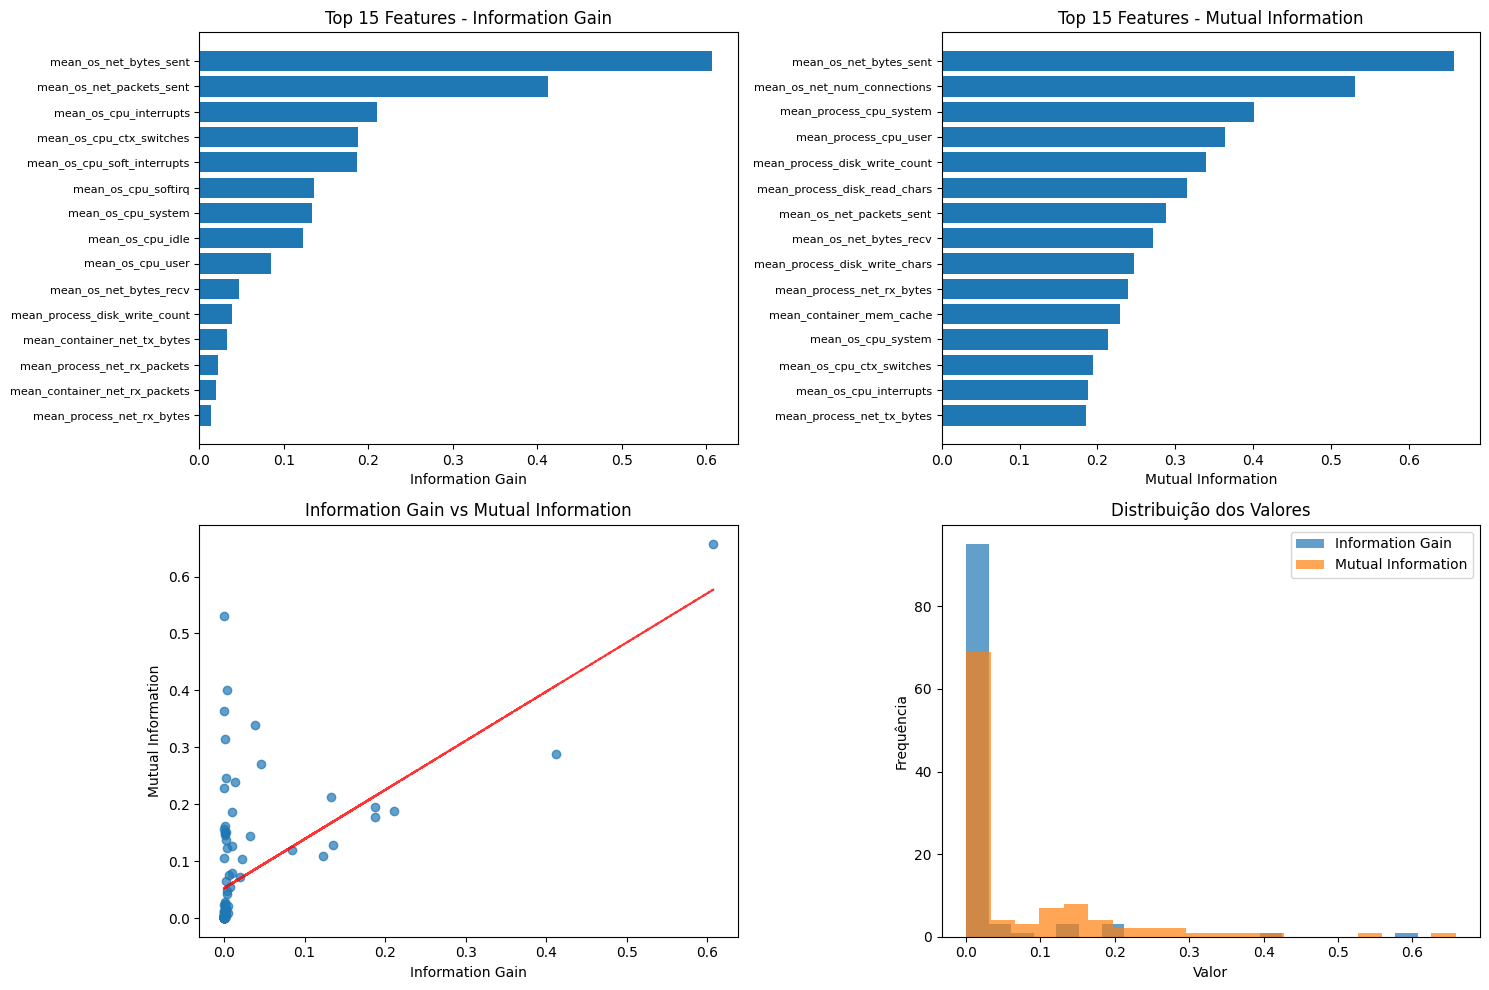

In [30]:
# Visualiza√ß√µes
plt.figure(figsize=(15, 10))

# Subplot 1: Top 15 features por Information Gain
plt.subplot(2, 2, 1)
if 'ig_results' in locals() and len(ig_results) > 0:
    top_ig = ig_results.head(15)
    plt.barh(range(len(top_ig)), top_ig['Information_Gain'])
    plt.yticks(range(len(top_ig)), top_ig['Feature'], fontsize=8)
    plt.xlabel('Information Gain')
    plt.title('Top 15 Features - Information Gain')
    plt.gca().invert_yaxis()

# Subplot 2: Top 15 features por Mutual Information
plt.subplot(2, 2, 2)
if 'mi_results' in locals() and len(mi_results) > 0:
    top_mi = mi_results.head(15)
    plt.barh(range(len(top_mi)), top_mi['Mutual_Information'])
    plt.yticks(range(len(top_mi)), top_mi['Feature'], fontsize=8)
    plt.xlabel('Mutual Information')
    plt.title('Top 15 Features - Mutual Information')
    plt.gca().invert_yaxis()

# Subplot 3: Correla√ß√£o entre IG e MI (se dispon√≠vel)
plt.subplot(2, 2, 3)
try:
    if 'combined_results' in locals() and len(combined_results) > 1:
        plt.scatter(combined_results['Information_Gain'], 
                   combined_results['Mutual_Information'], 
                   alpha=0.7)
        plt.xlabel('Information Gain')
        plt.ylabel('Mutual Information')
        plt.title('Information Gain vs Mutual Information')
        
        # Adiciona linha de tend√™ncia
        z = np.polyfit(combined_results['Information_Gain'].fillna(0), 
                      combined_results['Mutual_Information'].fillna(0), 1)
        p = np.poly1d(z)
        plt.plot(combined_results['Information_Gain'].fillna(0), 
                p(combined_results['Information_Gain'].fillna(0)), 
                "r--", alpha=0.8)
    else:
        plt.text(0.5, 0.5, 'Dados n√£o dispon√≠veis\npara correla√ß√£o', 
                ha='center', va='center', transform=plt.gca().transAxes)
except Exception as e:
    plt.text(0.5, 0.5, f'Erro: {str(e)[:50]}...', 
            ha='center', va='center', transform=plt.gca().transAxes)

# Subplot 4: Distribui√ß√£o dos valores
plt.subplot(2, 2, 4)
try:
    if 'ig_results' in locals() and 'mi_results' in locals():
        plt.hist(ig_results['Information_Gain'], alpha=0.7, label='Information Gain', bins=20)
        plt.hist(mi_results['Mutual_Information'], alpha=0.7, label='Mutual Information', bins=20)
        plt.xlabel('Valor')
        plt.ylabel('Frequ√™ncia')
        plt.title('Distribui√ß√£o dos Valores')
        plt.legend()
    else:
        plt.text(0.5, 0.5, 'Dados n√£o dispon√≠veis', 
                ha='center', va='center', transform=plt.gca().transAxes)
except Exception as e:
    plt.text(0.5, 0.5, f'Erro: {str(e)[:50]}...', 
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

## Salvando os Resultados

## Interpreta√ß√£o dos Resultados

### Information Gain vs Mutual Information

**Information Gain:**
- Mede a redu√ß√£o na entropia quando dividimos o dataset por um atributo
- Valores mais altos indicam maior capacidade de discrimina√ß√£o
- Favorece atributos com mais valores √∫nicos (pode ter vi√©s)

**Mutual Information:**
- Mede a depend√™ncia estat√≠stica entre vari√°veis
- Mais robusto para diferentes tipos de vari√°veis
- N√£o favorece atributos com mais valores √∫nicos

### Como usar os resultados:
1. **Sele√ß√£o de Features**: Use as features com maior IG ou MI para modelos de ML
2. **Feature Engineering**: Combine ou transforme features com baixo IG/MI
3. **An√°lise Explorat√≥ria**: Entenda quais vari√°veis s√£o mais informativas
4. **Redu√ß√£o de Dimensionalidade**: Mantenha apenas as features mais importantes

=== RESULTADOS DO GANHO DE INFORMA√á√ÉO ===

üèÜ TOP 20 FEATURES - INFORMA√á√ÉO M√öTUA:
 1. mean_os_net_bytes_sent                             | MI: 0.657883
 2. mean_os_net_num_connections                        | MI: 0.529928
 3. mean_process_cpu_system                            | MI: 0.401139
 4. mean_process_cpu_user                              | MI: 0.363641
 5. mean_process_disk_write_count                      | MI: 0.338784
 6. mean_process_disk_read_chars                       | MI: 0.314630
 7. mean_os_net_packets_sent                           | MI: 0.287810
 8. mean_os_net_bytes_recv                             | MI: 0.270781
 9. mean_process_disk_write_chars                      | MI: 0.246426
10. mean_process_net_rx_bytes                          | MI: 0.239660
11. mean_container_mem_cache                           | MI: 0.228949
12. mean_os_cpu_system                                 | MI: 0.212864
13. mean_os_cpu_ctx_switches                           | MI: 0.194604
1

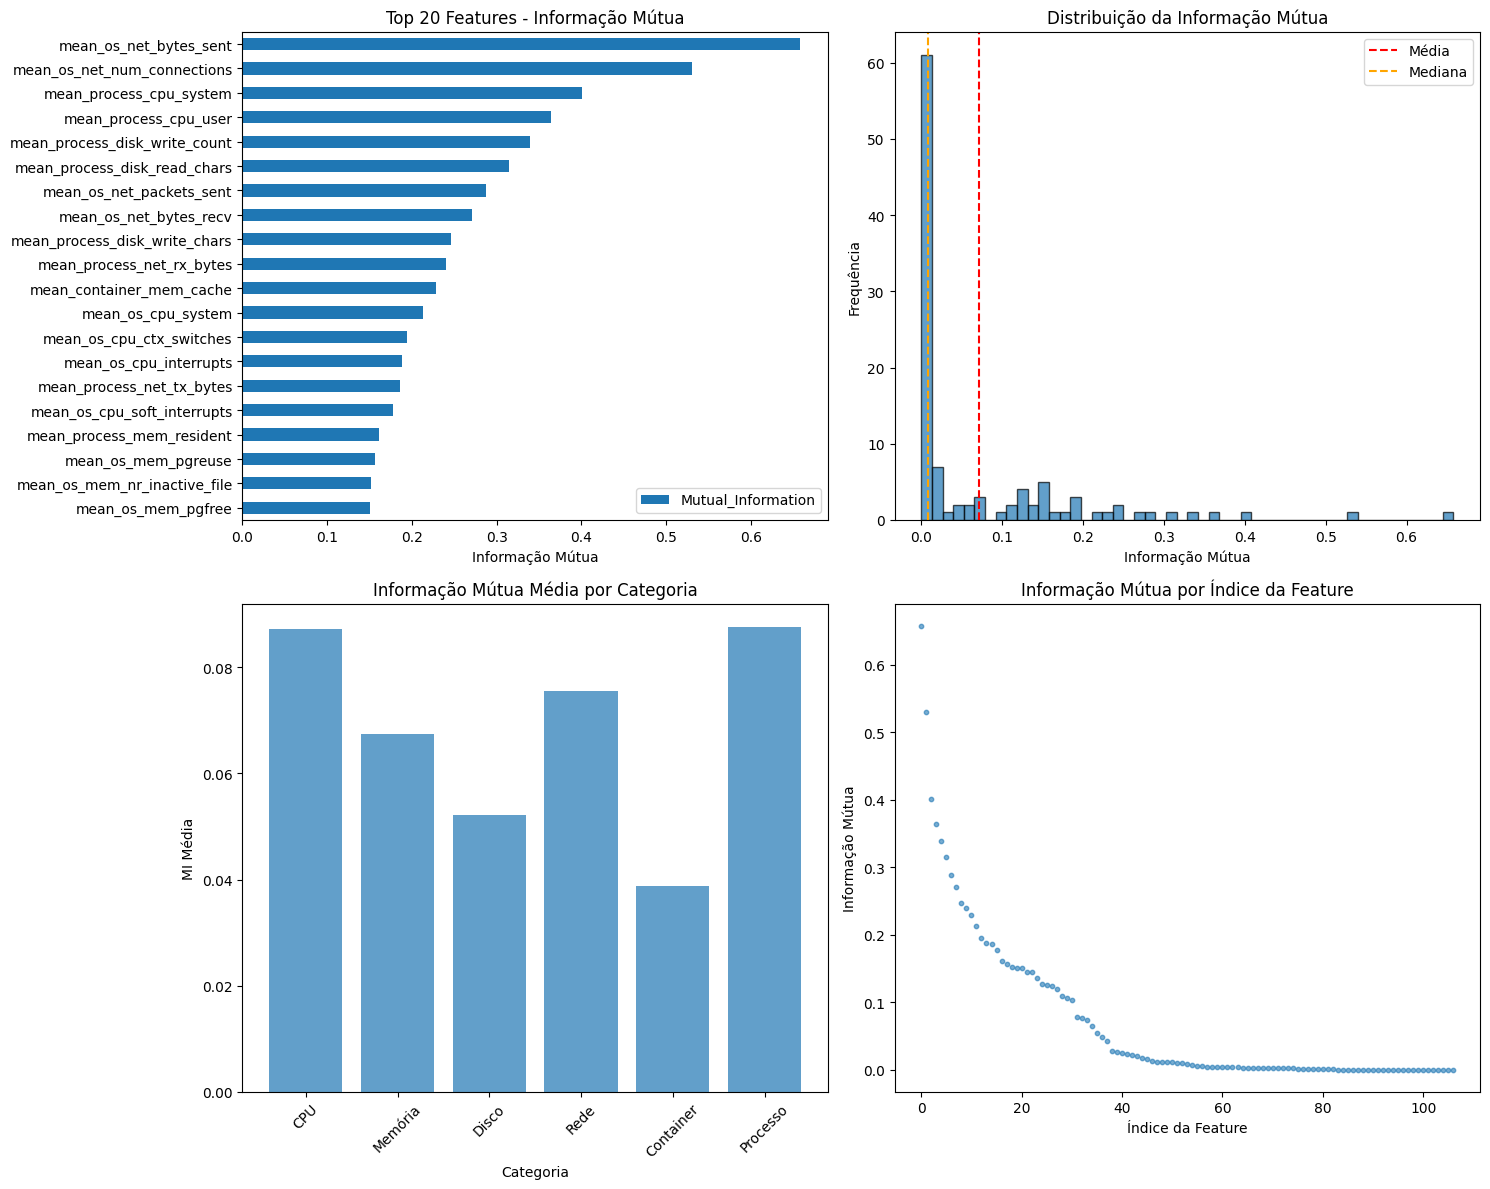

In [31]:
# An√°lise e visualiza√ß√£o dos resultados
target_column = 'target'  # Substitua pelo nome real da coluna alvo
if target_column is not None and 'mi_results' in locals() and mi_results is not None:
    
    print("=== RESULTADOS DO GANHO DE INFORMA√á√ÉO ===")
    
    # Top 20 features com maior informa√ß√£o m√∫tua
    print("\nüèÜ TOP 20 FEATURES - INFORMA√á√ÉO M√öTUA:")
    top_20_mi = mi_results.head(20)
    for i, (_, row) in enumerate(top_20_mi.iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:<50} | MI: {row['Mutual_Information']:.6f}")
    
    # Estat√≠sticas gerais
    print(f"\nüìä ESTAT√çSTICAS GERAIS:")
    print(f"‚Ä¢ Total de features analisadas: {len(mi_results)}")
    print(f"‚Ä¢ Informa√ß√£o M√∫tua m√©dia: {mi_results['Mutual_Information'].mean():.6f}")
    print(f"‚Ä¢ Informa√ß√£o M√∫tua mediana: {mi_results['Mutual_Information'].median():.6f}")
    print(f"‚Ä¢ Desvio padr√£o: {mi_results['Mutual_Information'].std():.6f}")
    print(f"‚Ä¢ Features com MI > 0.01: {(mi_results['Mutual_Information'] > 0.01).sum()}")
    print(f"‚Ä¢ Features com MI > 0.1: {(mi_results['Mutual_Information'] > 0.1).sum()}")
    
    # Visualiza√ß√µes
    plt.figure(figsize=(15, 12))
    
    # 1. Top 20 features
    plt.subplot(2, 2, 1)
    top_20_mi.plot(x='Feature', y='Mutual_Information', kind='barh', ax=plt.gca())
    plt.title('Top 20 Features - Informa√ß√£o M√∫tua')
    plt.xlabel('Informa√ß√£o M√∫tua')
    plt.ylabel('')
    plt.gca().invert_yaxis()
    
    # 2. Distribui√ß√£o dos valores de MI
    plt.subplot(2, 2, 2)
    plt.hist(mi_results['Mutual_Information'], bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(mi_results['Mutual_Information'].mean(), color='red', linestyle='--', label='M√©dia')
    plt.axvline(mi_results['Mutual_Information'].median(), color='orange', linestyle='--', label='Mediana')
    plt.title('Distribui√ß√£o da Informa√ß√£o M√∫tua')
    plt.xlabel('Informa√ß√£o M√∫tua')
    plt.ylabel('Frequ√™ncia')
    plt.legend()
    
    # 3. An√°lise por categoria de m√©trica
    print(f"\nüìã AN√ÅLISE POR CATEGORIA:")
    
    categorias = {
        'CPU': [col for col in mi_results['Feature'] if 'cpu' in col.lower()],
        'Mem√≥ria': [col for col in mi_results['Feature'] if 'mem' in col.lower()],
        'Disco': [col for col in mi_results['Feature'] if 'disk' in col.lower()],
        'Rede': [col for col in mi_results['Feature'] if 'net' in col.lower()],
        'Container': [col for col in mi_results['Feature'] if 'container' in col.lower()],
        'Processo': [col for col in mi_results['Feature'] if 'process' in col.lower()]
    }
    
    categoria_scores = {}
    for categoria, features_cat in categorias.items():
        if features_cat:
            scores = mi_results[mi_results['Feature'].isin(features_cat)]['Mutual_Information']
            categoria_scores[categoria] = {
                'count': len(scores),
                'mean': scores.mean(),
                'max': scores.max(),
                'top_feature': mi_results[mi_results['Feature'].isin(features_cat)].iloc[0]['Feature'] if len(scores) > 0 else 'N/A'
            }
            print(f"‚Ä¢ {categoria}: {len(scores)} features | M√©dia MI: {scores.mean():.6f} | Max: {scores.max():.6f}")
    
    # 4. MI por categoria
    plt.subplot(2, 2, 3)
    if categoria_scores:
        cats = list(categoria_scores.keys())
        means = [categoria_scores[cat]['mean'] for cat in cats]
        plt.bar(cats, means, alpha=0.7)
        plt.title('Informa√ß√£o M√∫tua M√©dia por Categoria')
        plt.xlabel('Categoria')
        plt.ylabel('MI M√©dia')
        plt.xticks(rotation=45)
    
    # 5. Scatter plot: MI vs Feature Index
    plt.subplot(2, 2, 4)
    plt.scatter(range(len(mi_results)), mi_results['Mutual_Information'], alpha=0.6, s=10)
    plt.title('Informa√ß√£o M√∫tua por √çndice da Feature')
    plt.xlabel('√çndice da Feature')
    plt.ylabel('Informa√ß√£o M√∫tua')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("‚ùå Resultados n√£o dispon√≠veis para visualiza√ß√£o")

## üöÄ Aplica√ß√£o Pr√°tica das Features Selecionadas

Esta se√ß√£o demonstra como aplicar os resultados da an√°lise de ganho de informa√ß√£o e mutual information na pr√°tica, criando datasets reduzidos e fornecendo exemplos de uso em Machine Learning.

In [32]:
# 1. Cria√ß√£o de Datasets Reduzidos com Features Selecionadas
print("üìä CRIA√á√ÉO DE DATASETS REDUZIDOS")
print("="*70)

# Verificar se os resultados necess√°rios existem
required_vars = ['ig_results', 'mi_results', 'selection_results']
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print(f"‚ùå Vari√°veis necess√°rias n√£o encontradas: {missing_vars}")
    print("   Execute primeiro as c√©lulas de an√°lise de ganho de informa√ß√£o!")
else:
    print("‚úÖ Todas as vari√°veis necess√°rias encontradas!")
    
    # Usar estrat√©gia recomendada (acima da mediana)
    if 'selection_results' in globals() and 'above_median' in selection_results:
        selected_features = selection_results['above_median']['both_criteria']
        strategy_used = 'above_median'
    else:
        # Fallback: usar top 25% das features por MI
        print("‚ö†Ô∏è Usando estrat√©gia de fallback: top 25% por Mutual Information")
        top_25_count = max(1, len(mi_results) // 4)  # Pelo menos 1 feature
        selected_features = mi_results.head(top_25_count)['Feature'].tolist()
        strategy_used = 'top_25_percent_mi'
    
    print(f"\nüéØ Estrat√©gia utilizada: {strategy_used}")
    print(f"üìä Features selecionadas: {len(selected_features)}")
    print(f"üìä Features originais: {X.shape[1]}")
    print(f"üìâ Redu√ß√£o: {(1 - len(selected_features)/X.shape[1])*100:.1f}%")
    
    # Criar datasets reduzidos
    if len(selected_features) > 0:
        print(f"\nüî® Criando datasets reduzidos...")
        
        # Dataset principal reduzido
        X_selected = X[selected_features].copy()
        
        # Datasets de treinamento reduzidos
        if isinstance(X_train, pd.DataFrame):
            # Se X_train √© DataFrame
            available_features = [f for f in selected_features if f in X_train.columns]
            X_train_selected = X_train[available_features].copy()
            X_test_selected = X_test[available_features].copy() if 'X_test' in globals() else None
            X_val_selected = X_val[available_features].copy() if 'X_val' in globals() else None
        else:
            # Se X_train √© numpy array, usar √≠ndices
            if hasattr(X, 'columns'):
                feature_indices = [i for i, col in enumerate(X.columns) if col in selected_features]
                X_train_selected = X_train[:, feature_indices]
                X_test_selected = X_test[:, feature_indices] if 'X_test' in globals() else None
                X_val_selected = X_val[:, feature_indices] if 'X_val' in globals() else None
            else:
                print("‚ö†Ô∏è N√£o foi poss√≠vel criar vers√µes numpy dos datasets de treino")
                X_train_selected = None
                X_test_selected = None
                X_val_selected = None
        
        print(f"‚úÖ Datasets reduzidos criados:")
        print(f"   ‚Ä¢ X_selected shape: {X_selected.shape}")
        if X_train_selected is not None:
            print(f"   ‚Ä¢ X_train_selected shape: {X_train_selected.shape}")
        if X_test_selected is not None:
            print(f"   ‚Ä¢ X_test_selected shape: {X_test_selected.shape}")
        if X_val_selected is not None:
            print(f"   ‚Ä¢ X_val_selected shape: {X_val_selected.shape}")
        
        # Criar summary das features selecionadas
        print(f"\nüìã Criando summary das features selecionadas...")
        selected_summary_data = []
        
        for feature in selected_features:
            # Obter scores de IG e MI
            ig_score = ig_results[ig_results['Feature'] == feature]['Information_Gain'].iloc[0] if feature in ig_results['Feature'].values else 0
            mi_score = mi_results[mi_results['Feature'] == feature]['Mutual_Information'].iloc[0] if feature in mi_results['Feature'].values else 0
            
            selected_summary_data.append({
                'Feature': feature,
                'Information_Gain': ig_score,
                'Mutual_Information': mi_score,
                'Rank_IG': ig_results[ig_results['Feature'] == feature].index[0] + 1 if feature in ig_results['Feature'].values else len(ig_results) + 1,
                'Rank_MI': mi_results[mi_results['Feature'] == feature].index[0] + 1 if feature in mi_results['Feature'].values else len(mi_results) + 1
            })
        
        selected_features_summary = pd.DataFrame(selected_summary_data)
        selected_features_summary = selected_features_summary.sort_values('Information_Gain', ascending=False)
        
        print(f"‚úÖ Summary criado com {len(selected_features_summary)} features")
        
        # Mostrar top 10 features selecionadas
        print(f"\nüèÜ TOP 10 FEATURES SELECIONADAS:")
        print("-" * 70)
        for idx, row in selected_features_summary.head(10).iterrows():
            print(f"   {row['Rank_IG']:2d}. {row['Feature']:30s} | IG: {row['Information_Gain']:.6f} | MI: {row['Mutual_Information']:.6f}")
        
        # Salvar no ambiente global
        globals()['X_selected'] = X_selected
        globals()['selected_features_list'] = selected_features
        selected_features_list = selected_features  # Para exibi√ß√£o
        globals()['selected_features_summary'] = selected_features_summary
        if X_train_selected is not None:
            globals()['X_train_selected'] = X_train_selected
        if X_test_selected is not None:
            globals()['X_test_selected'] = X_test_selected
        if X_val_selected is not None:
            globals()['X_val_selected'] = X_val_selected
        
        print(f"\nüíæ Vari√°veis criadas no ambiente:")
        print(f"   ‚Ä¢ X_selected: Dataset principal com features selecionadas")
        print(f"   ‚Ä¢ selected_features_list: Lista das features selecionadas")
        print(f"   ‚Ä¢ selected_features_summary: DataFrame com rankings e scores")
        if X_train_selected is not None:
            print(f"   ‚Ä¢ X_train_selected, X_test_selected, X_val_selected: Conjuntos de treino/teste/valida√ß√£o")
        
    else:
        print("‚ùå Nenhuma feature selecionada! Verifique os thresholds utilizados.")



üìä CRIA√á√ÉO DE DATASETS REDUZIDOS
‚úÖ Todas as vari√°veis necess√°rias encontradas!

üéØ Estrat√©gia utilizada: above_median
üìä Features selecionadas: 48
üìä Features originais: 107
üìâ Redu√ß√£o: 55.1%

üî® Criando datasets reduzidos...
‚úÖ Datasets reduzidos criados:
   ‚Ä¢ X_selected shape: (32259, 48)
   ‚Ä¢ X_train_selected shape: (32259, 48)
   ‚Ä¢ X_test_selected shape: (24194, 48)
   ‚Ä¢ X_val_selected shape: (24195, 48)

üìã Criando summary das features selecionadas...
‚úÖ Summary criado com 48 features

üèÜ TOP 10 FEATURES SELECIONADAS:
----------------------------------------------------------------------
   40. mean_os_net_bytes_sent         | IG: 0.607395 | MI: 0.657883
   46. mean_os_net_packets_sent       | IG: 0.412268 | MI: 0.287810
    5. mean_os_cpu_interrupts         | IG: 0.210774 | MI: 0.187693
    1. mean_os_cpu_ctx_switches       | IG: 0.187970 | MI: 0.194604
    9. mean_os_cpu_soft_interrupts    | IG: 0.186976 | MI: 0.177362
   10. mean_os_cpu_softir

In [19]:
# 2. Salvamento de Arquivos
print("\nüíæ SALVAMENTO DE ARQUIVOS")
print("="*70)

if 'selected_features_list' in globals() and len(selected_features_list) > 0:
    try:
        import os
        import pickle
        
        # Criar diret√≥rio se n√£o existir
        output_dir = '../dataset'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"üìÅ Diret√≥rio criado: {output_dir}")
        
        # 1. Salvar lista de features selecionadas (selected_features.txt)
        features_file = os.path.join(output_dir, 'selected_features.txt')
        with open(features_file, 'w', encoding='utf-8') as f:
            f.write(f"# Features Selecionadas - An√°lise de Ganho de Informa√ß√£o\n")
            f.write(f"# Data: {pd.Timestamp.now()}\n")
            f.write(f"# Estrat√©gia: {strategy_used}\n")
            f.write(f"# Total de features: {len(selected_features_list)}\n")
            f.write(f"# Redu√ß√£o: {(1 - len(selected_features_list)/X.shape[1])*100:.1f}%\n")
            f.write(f"#\n")
            for i, feature in enumerate(selected_features_list, 1):
                f.write(f"{feature}\n")
        
        print(f"‚úÖ {features_file}")
        print(f"   ‚Ä¢ {len(selected_features_list)} features salvas")
        
        # 2. Salvar dataset reduzido completo em pickle
        if 'X_selected' in globals():
            dataset_pickle_file = os.path.join(output_dir, f'{nome_dataset}_selected_datasets.pkl')
            
            # Criar dicion√°rio com todos os datasets selecionados
            selected_data = {
                'X_selected': X_selected,
                'y_selected' : y,
                'selected_features_list': selected_features_list,
                'selected_features_summary': selected_features_summary if 'selected_features_summary' in globals() else None,
                'strategy_used': strategy_used,
                'creation_date': pd.Timestamp.now(),
                'original_shape': X.shape,
                'selected_shape': X_selected.shape,
                'reduction_percentage': (1 - len(selected_features_list)/X.shape[1])*100
            }
            
            # Adicionar conjuntos de treino/teste/valida√ß√£o se dispon√≠veis
            if 'X_train_selected' in globals() and X_train_selected is not None:
                selected_data['X_train_selected'] = X_train_selected
            if 'X_test_selected' in globals() and X_test_selected is not None:
                selected_data['X_test_selected'] = X_test_selected
            if 'X_val_selected' in globals() and X_val_selected is not None:
                selected_data['X_val_selected'] = X_val_selected
            
            # Adicionar targets se dispon√≠veis no ambiente global
            if 'y_train' in globals():
                selected_data['y_train'] = y_train
            if 'y_test' in globals():
                selected_data['y_test'] = y_test
            if 'y_val' in globals():
                selected_data['y_val'] = y_val
            if 'y' in globals():
                selected_data['y'] = y
            
            # Salvar em pickle
            with open(dataset_pickle_file, 'wb') as f:
                pickle.dump(selected_data, f)
            print(f"‚úÖ {dataset_pickle_file}")
            print(f"   ‚Ä¢ Shape: {X_selected.shape}")
            print(f"   ‚Ä¢ Tamanho: {os.path.getsize(dataset_pickle_file) / (1024*1024):.2f} MB")
            print(f"   ‚Ä¢ Conte√∫do: {len(selected_data)} objetos salvos")
        
        # 3. Salvar summary com scores em pickle separado
        if 'selected_features_summary' in globals():
            summary_pickle_file = os.path.join(output_dir, f'{nome_dataset}_selected_features_summary.pkl')
            with open(summary_pickle_file, 'wb') as f:
                pickle.dump(selected_features_summary, f)
            print(f"‚úÖ {summary_pickle_file}")
            print(f"   ‚Ä¢ {len(selected_features_summary)} features com scores e rankings")
        
        # 4. Listar conjuntos salvos no pickle principal
        saved_datasets = []
        if 'X_train_selected' in globals() and X_train_selected is not None:
            saved_datasets.append(f"X_train_selected ({X_train_selected.shape})")
        if 'X_test_selected' in globals() and X_test_selected is not None:
            saved_datasets.append(f"X_test_selected ({X_test_selected.shape})")
        if 'X_val_selected' in globals() and X_val_selected is not None:
            saved_datasets.append(f"X_val_selected ({X_val_selected.shape})")
        
        if saved_datasets:
            print(f"‚úÖ Conjuntos treino/teste/valida√ß√£o (no pickle principal):")
            for dataset_info in saved_datasets:
                print(f"   ‚Ä¢ {dataset_info}")
        
        # 5. Criar arquivo README com informa√ß√µes atualizadas
        readme_file = os.path.join(output_dir, f'{nome_dataset}_README_selected_features.md')
        with open(readme_file, 'w', encoding='utf-8') as f:
            f.write("# Features Selecionadas - An√°lise de Ganho de Informa√ß√£o\n\n")
            f.write(f"**Data de cria√ß√£o:** {pd.Timestamp.now()}\n\n")
            f.write(f"**Estrat√©gia utilizada:** {strategy_used}\n\n")
            f.write(f"## Resumo\n\n")
            f.write(f"- **Features originais:** {X.shape[1]}\n")
            f.write(f"- **Features selecionadas:** {len(selected_features_list)}\n")
            f.write(f"- **Redu√ß√£o:** {(1 - len(selected_features_list)/X.shape[1])*100:.1f}%\n\n")
            
            f.write(f"## Arquivos Gerados\n\n")
            f.write(f"1. **selected_features.txt** - Lista simples das features selecionadas\n")
            f.write(f"2. **selected_datasets.pkl** - Arquivo pickle com todos os datasets reduzidos e metadados\n")
            f.write(f"3. **selected_features_summary.pkl** - Scores e rankings detalhados das features (pickle)\n")
            f.write(f"4. **README_selected_features.md** - Este arquivo de documenta√ß√£o\n")
            
            f.write(f"\n## Conte√∫do do Arquivo Pickle Principal\n\n")
            f.write(f"O arquivo `selected_datasets.pkl` cont√©m:\n")
            f.write(f"- **X_selected**: Dataset principal com features selecionadas\n")
            f.write(f"- **selected_features_list**: Lista das features selecionadas\n")
            f.write(f"- **selected_features_summary**: DataFrame com scores e rankings\n")
            if saved_datasets:
                f.write(f"- **Conjuntos treino/teste/valida√ß√£o**: Vers√µes reduzidas dos conjuntos\n")
            f.write(f"- **Metadados**: Estrat√©gia usada, data de cria√ß√£o, informa√ß√µes de redu√ß√£o\n")
            
            f.write(f"\n## Top 10 Features\n\n")
            f.write(f"| Rank | Feature | Information Gain | Mutual Information |\n")
            f.write(f"|------|---------|------------------|--------------------|\n")
            if 'selected_features_summary' in globals():
                for idx, row in selected_features_summary.head(10).iterrows():
                    f.write(f"| {row['Rank_IG']:2d} | {row['Feature']} | {row['Information_Gain']:.6f} | {row['Mutual_Information']:.6f} |\n")
            
            f.write(f"\n## Como Usar\n\n")
            f.write(f"```python\n")
            f.write(f"import pandas as pd\n")
            f.write(f"import numpy as np\n")
            f.write(f"import pickle\n\n")
            f.write(f"# Carregar features selecionadas (texto)\n")
            f.write(f"with open('selected_features.txt', 'r') as f:\n")
            f.write(f"    selected_features = [line.strip() for line in f if not line.startswith('#') and line.strip()]\n\n")
            f.write(f"# Carregar todos os datasets e metadados (pickle)\n")
            f.write(f"with open('selected_datasets.pkl', 'rb') as f:\n")
            f.write(f"    data = pickle.load(f)\n\n")
            f.write(f"# Acessar datasets\n")
            f.write(f"X_selected = data['X_selected']\n")
            f.write(f"selected_features = data['selected_features_list']\n")
            f.write(f"summary = data['selected_features_summary']\n\n")
            f.write(f"# Acessar conjuntos de treino/teste (se dispon√≠veis)\n")
            f.write(f"if 'X_train_selected' in data:\n")
            f.write(f"    X_train_selected = data['X_train_selected']\n")
            f.write(f"    y_train = data.get('y_train', None)\n\n")
            f.write(f"# Carregar summary separado (pickle)\n")
            f.write(f"with open('selected_features_summary.pkl', 'rb') as f:\n")
            f.write(f"    summary_df = pickle.load(f)\n")
            f.write(f"```\n")
        
        print(f"‚úÖ {readme_file}")
        print(f"   ‚Ä¢ Documenta√ß√£o completa criada")
        
        print(f"\nüìä RESUMO DE ARQUIVOS SALVOS:")
        print(f"   ‚Ä¢ Total de arquivos: 4 (TXT + PKL principal + PKL summary + README)")
        print(f"   ‚Ä¢ Formato principal: Pickle (mais eficiente e preserva tipos)")
        print(f"   ‚Ä¢ Diret√≥rio: {os.path.abspath(output_dir)}")
        
        print(f"\nüîç VANTAGENS DO FORMATO PICKLE:")
        print(f"   ‚Ä¢ Preserva tipos de dados originais (DataFrame, numpy arrays)")
        print(f"   ‚Ä¢ Carregamento mais r√°pido que CSV")
        print(f"   ‚Ä¢ Menor tamanho de arquivo")
        print(f"   ‚Ä¢ Suporte nativo a objetos Python complexos")
        print(f"   ‚Ä¢ Metadados inclu√≠dos no mesmo arquivo")
        
    except Exception as e:
        print(f"‚ùå Erro ao salvar arquivos: {e}")
        print(f"   Verifique permiss√µes de escrita no diret√≥rio {output_dir}")

else:
    print("‚ùå Nenhuma feature selecionada para salvar!")


üíæ SALVAMENTO DE ARQUIVOS
‚úÖ ../dataset\selected_features.txt
   ‚Ä¢ 48 features salvas
‚úÖ ../dataset\svm_selected_datasets.pkl
   ‚Ä¢ Shape: (32259, 48)
   ‚Ä¢ Tamanho: 42.83 MB
   ‚Ä¢ Conte√∫do: 16 objetos salvos
‚úÖ ../dataset\svm_selected_features_summary.pkl
   ‚Ä¢ 48 features com scores e rankings
‚úÖ Conjuntos treino/teste/valida√ß√£o (no pickle principal):
   ‚Ä¢ X_train_selected ((32259, 48))
   ‚Ä¢ X_test_selected ((24194, 48))
   ‚Ä¢ X_val_selected ((24195, 48))
‚úÖ ../dataset\svm_README_selected_features.md
   ‚Ä¢ Documenta√ß√£o completa criada

üìä RESUMO DE ARQUIVOS SALVOS:
   ‚Ä¢ Total de arquivos: 4 (TXT + PKL principal + PKL summary + README)
   ‚Ä¢ Formato principal: Pickle (mais eficiente e preserva tipos)
   ‚Ä¢ Diret√≥rio: c:\Users\cpires\OneDrive - STJ- Superior Tribunal de Justi√ßa\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon\dataset

üîç VANTAGENS DO FORMATO PICKLE:
   ‚Ä¢ Preserva tipos de dados originais (DataFrame, numpy arrays)
   ‚Ä¢ Carregament

In [33]:
"""
# 2. Atualizar dataset pickle original com datasets reduzidos
print("\nüíæ ATUALIZA√á√ÉO DO DATASET PICKLE ORIGINAL")
# 
            
with open(arq_dataset_pkl, 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'X_test': X_test,
        'X_val': X_val,
        'y_train': y_train,
        'y_test': y_test,
        'y_val': y_val,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'X_val_scaled': X_val_scaled,
        'yeo_johnson_transformer': datasets['yeo_johnson_transformer'] if 'yeo_johnson_transformer' in datasets else None,
        'classes_mapping': classes_mapping, 
        'features_ganho_informacao': selected_features if 'selected_features_list' in globals() else None
    }, f)

# Mostrar os dado de feature_ganho_informacao salvos
if 'selected_features_list' in globals():
    print(f"‚úÖ Dataset pickle atualizado com 'features_ganho_informacao' ({len(selected_features_list)} features)")
    print(f"   ‚Ä¢ Arquivo: {arq_dataset_pkl}")
    print(f"   ‚Ä¢ Caminho absoluto: {os.path.abspath(arq_dataset_pkl)}")
"""
import lib_analise
datasets['X_train'] = X_train
datasets['X_test'] = X_test
datasets['X_val'] = X_val
datasets['features_ganho_informacao'] = selected_features if 'selected_features_list' in globals() else None
lib_analise.save_informacao_analise(datasets=datasets)
lib_analise.print_informacao_analise()

‚úÖ Dataset salvo com sucesso em ../dataset/svm.pkl
X_train.shape (32259, 107)
X_test.shape (24194, 107)
X_val.shape (24195, 107)
X_train_scaled.shape (32259, 122)
X_test_scaled.shape (24194, 122)
X_val_scaled.shape (24195, 122)


{'nome_dataset': 'svm',
 'X_train':        mean_os_cpu_ctx_switches  mean_os_cpu_guest  mean_os_cpu_guest_nice  \
 7604                    19147.0                0.0                     0.0   
 59824                  179540.0                0.0                     0.0   
 68249                   23005.0                0.0                     0.0   
 23816                   26245.0                0.0                     0.0   
 33886                   17678.0                0.0                     0.0   
 ...                         ...                ...                     ...   
 40008                   91084.0                0.0                     0.0   
 54639                   23150.0                0.0                     0.0   
 48314                   16879.0                0.0                     0.0   
 10893                   12860.0                0.0                     0.0   
 29578                   13783.0                0.0                     0.0   
 
        mean_os

In [21]:
# 3. Exemplos de Uso em Machine Learning
print("\nü§ñ EXEMPLOS DE USO EM MACHINE LEARNING")
print("="*70)

if 'X_selected' in globals() and 'y' in globals():
    
    print("üìö Exemplo 1: Compara√ß√£o de Performance - Dataset Completo vs Reduzido")
    print("-" * 60)
    
    # C√≥digo de exemplo para comparar performance
    example_code_1 = '''
# Importa√ß√µes necess√°rias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# 1. Dataset completo
print("üîç Testando dataset completo...")
X_full = X  # Todas as features
y_target = y

# Divis√£o treino/teste
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset completo
start_time = time.time()
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_full_train, y_full_train)
full_train_time = time.time() - start_time

# Predi√ß√£o com dataset completo
y_full_pred = rf_full.predict(X_full_test)
full_accuracy = accuracy_score(y_full_test, y_full_pred)

print(f"   ‚Ä¢ Features: {X_full.shape[1]}")
print(f"   ‚Ä¢ Tempo de treino: {full_train_time:.2f}s")
print(f"   ‚Ä¢ Acur√°cia: {full_accuracy:.4f}")

# 2. Dataset reduzido
print("\\nüéØ Testando dataset reduzido...")
X_reduced = X_selected  # Apenas features selecionadas
y_target = y

# Divis√£o treino/teste
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(
    X_reduced, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset reduzido
start_time = time.time()
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_red_train, y_red_train)
reduced_train_time = time.time() - start_time

# Predi√ß√£o com dataset reduzido
y_red_pred = rf_reduced.predict(X_red_test)
reduced_accuracy = accuracy_score(y_red_test, y_red_pred)

print(f"   ‚Ä¢ Features: {X_reduced.shape[1]}")
print(f"   ‚Ä¢ Tempo de treino: {reduced_train_time:.2f}s")
print(f"   ‚Ä¢ Acur√°cia: {reduced_accuracy:.4f}")

# 3. Compara√ß√£o
print("\\nüìä COMPARA√á√ÉO DE RESULTADOS:")
print(f"   ‚Ä¢ Redu√ß√£o de features: {(1 - X_reduced.shape[1]/X_full.shape[1])*100:.1f}%")
print(f"   ‚Ä¢ Speedup no treino: {full_train_time/reduced_train_time:.2f}x")
print(f"   ‚Ä¢ Diferen√ßa de acur√°cia: {(reduced_accuracy - full_accuracy)*100:.2f}%")
'''
    
    print("üí° C√ìDIGO EXEMPLO 1 (copie e execute em uma nova c√©lula):")
    print(example_code_1)
    
    print("\n" + "-" * 60)
    print("üìö Exemplo 2: Pipeline Completo com Features Selecionadas")
    print("-" * 60)
    
    example_code_2 = '''
# Pipeline completo com valida√ß√£o cruzada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

# Definir modelos para testar
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Configurar valida√ß√£o cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testar cada modelo com features selecionadas
print("üß™ Testando modelos com features selecionadas...")
results = {}

for model_name, model in models.items():
    # Criar pipeline com normaliza√ß√£o
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Valida√ß√£o cruzada
    cv_scores = cross_val_score(pipeline, X_selected, y, cv=cv, scoring='accuracy')
    
    results[model_name] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std(),
        'scores': cv_scores
    }
    
    print(f"   ‚Ä¢ {model_name:20s}: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")

# Encontrar melhor modelo
best_model = max(results.keys(), key=lambda k: results[k]['mean_accuracy'])
print(f"\\nüèÜ Melhor modelo: {best_model}")
print(f"   ‚Ä¢ Acur√°cia: {results[best_model]['mean_accuracy']:.4f} ¬± {results[best_model]['std_accuracy']:.4f}")
'''
    
    print("üí° C√ìDIGO EXEMPLO 2 (copie e execute em uma nova c√©lula):")
    print(example_code_2)
    
    print("\n" + "-" * 60)
    print("üìö Exemplo 3: Carregamento e Uso dos Arquivos Salvos")
    print("-" * 60)
    
    example_code_3 = '''
# Como carregar e usar os arquivos salvos (FORMATO PICKLE)
import pandas as pd
import numpy as np
import pickle

# 1. Carregar lista de features selecionadas (texto)
def load_selected_features(filename='../dataset/selected_features.txt'):
    with open(filename, 'r', encoding='utf-8') as f:
        features = []
        for line in f:
            line = line.strip()
            # Ignorar linhas de coment√°rio e vazias
            if line and not line.startswith('#'):
                features.append(line)
    return features

# 2. Carregar todos os datasets e metadados (pickle principal)
def load_selected_datasets(filename='../dataset/selected_datasets.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# 3. Carregar summary das features (pickle separado)
def load_features_summary(filename='../dataset/selected_features_summary.pkl'):
    with open(filename, 'rb') as f:
        return pickle.load(f)

# Exemplo de uso
try:
    # Carregar dados
    selected_features = load_selected_features()  # Lista de features (TXT)
    data = load_selected_datasets()  # Todos os datasets (PICKLE)
    features_summary = load_features_summary()  # Summary (PICKLE)
    
    # Extrair dados do pickle
    X_reduced_loaded = data['X_selected']
    metadata = {
        'strategy': data['strategy_used'],
        'creation_date': data['creation_date'],
        'reduction': data['reduction_percentage']
    }
    
    print(f"‚úÖ Dados carregados com sucesso!")
    print(f"   ‚Ä¢ Features selecionadas: {len(selected_features)}")
    print(f"   ‚Ä¢ Shape do dataset: {X_reduced_loaded.shape}")
    print(f"   ‚Ä¢ Estrat√©gia usada: {metadata['strategy']}")
    print(f"   ‚Ä¢ Redu√ß√£o: {metadata['reduction']:.1f}%")
    
    # Verificar se h√° conjuntos de treino/teste
    if 'X_train_selected' in data:
        print(f"   ‚Ä¢ Treino dispon√≠vel: {data['X_train_selected'].shape}")
    if 'X_test_selected' in data:
        print(f"   ‚Ä¢ Teste dispon√≠vel: {data['X_test_selected'].shape}")
    
    print(f"   ‚Ä¢ Top 5 features por IG:")
    for idx, row in features_summary.head(5).iterrows():
        print(f"     {idx+1}. {row['Feature']} (IG: {row['Information_Gain']:.6f})")
        
except FileNotFoundError as e:
    print(f"‚ùå Arquivo n√£o encontrado: {e}")
    print("   Execute primeiro a c√©lula de salvamento de arquivos!")
except Exception as e:
    print(f"‚ùå Erro ao carregar pickle: {e}")
    print("   Verifique se os arquivos foram salvos corretamente!")

# 4. Aplicar sele√ß√£o de features em novos dados
def apply_feature_selection(new_data, selected_features):
    """
    Aplica a sele√ß√£o de features em um novo dataset
    """
    available_features = [f for f in selected_features if f in new_data.columns]
    missing_features = [f for f in selected_features if f not in new_data.columns]
    
    if missing_features:
        print(f"‚ö†Ô∏è Features n√£o encontradas: {len(missing_features)}")
        print(f"   Usando {len(available_features)} de {len(selected_features)} features")
    
    return new_data[available_features]

# Exemplo de uso com novos dados
# new_X_reduced = apply_feature_selection(new_dataset, selected_features)
'''
    
    print("üí° C√ìDIGO EXEMPLO 3 (copie e execute em uma nova c√©lula):")
    print(example_code_3)
    
    print(f"\nüéØ PR√ìXIMOS PASSOS RECOMENDADOS:")
    print("=" * 50)
    print("1. üìä Execute os exemplos acima em c√©lulas separadas")
    print("2. üîç Compare performance entre dataset completo e reduzido")
    print("3. üß™ Teste diferentes algoritmos com as features selecionadas")
    print("4. üìà Analise feature importance dos modelos treinados")
    print("5. üîÑ Ajuste thresholds se necess√°rio para melhor performance")
    print("6. üíæ Documente os resultados para uso futuro")
    
    print(f"\n‚ú® VARI√ÅVEIS DISPON√çVEIS NO AMBIENTE:")
    available_vars = []
    for var_name in ['X_selected', 'selected_features_list', 'selected_features_summary', 
                     'X_train_selected', 'X_test_selected', 'X_val_selected']:
        if var_name in globals():
            available_vars.append(var_name)
    
    for var in available_vars:
        var_obj = globals()[var]
        if hasattr(var_obj, 'shape'):
            print(f"   ‚Ä¢ {var}: shape {var_obj.shape}")
        else:
            print(f"   ‚Ä¢ {var}: {type(var_obj).__name__} com {len(var_obj)} itens")

else:
    print("‚ùå Datasets necess√°rios n√£o encontrados!")
    print("   Execute primeiro as c√©lulas anteriores para criar X_selected e y")


ü§ñ EXEMPLOS DE USO EM MACHINE LEARNING
üìö Exemplo 1: Compara√ß√£o de Performance - Dataset Completo vs Reduzido
------------------------------------------------------------
üí° C√ìDIGO EXEMPLO 1 (copie e execute em uma nova c√©lula):

# Importa√ß√µes necess√°rias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

# 1. Dataset completo
print("üîç Testando dataset completo...")
X_full = X  # Todas as features
y_target = y

# Divis√£o treino/teste
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X_full, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Treinamento com dataset completo
start_time = time.time()
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_full_train, y_full_train)
full_train_time = time.time()

In [22]:
# 4. Demonstra√ß√£o de Carregamento dos Arquivos Pickle
print("\nüì¶ DEMONSTRA√á√ÉO DE CARREGAMENTO DOS ARQUIVOS PICKLE")
print("="*70)

# Simula√ß√£o de como carregar os arquivos salvos
try:
    import pickle
    import os
    
    # Verificar se os arquivos existem
    pickle_file = f'../dataset/{nome_dataset}_selected_datasets.pkl'
    summary_file = f'../dataset/{nome_dataset}_selected_features_summary.pkl'
    features_file = f'../dataset/{nome_dataset}_selected_features.txt'

    files_exist = {
        'pickle_principal': os.path.exists(pickle_file),
        'pickle_summary': os.path.exists(summary_file),
        'features_txt': os.path.exists(features_file)
    }
    
    print("üîç Verificando arquivos salvos:")
    for file_type, exists in files_exist.items():
        status = "‚úÖ Existe" if exists else "‚ùå N√£o encontrado"
        print(f"   ‚Ä¢ {file_type}: {status}")
    
    if files_exist['pickle_principal']:
        print(f"\nüìä CARREGANDO ARQUIVO PICKLE PRINCIPAL...")
        
        # Carregar arquivo pickle principal
        with open(pickle_file, 'rb') as f:
            loaded_data = pickle.load(f)
        
        print(f"‚úÖ Arquivo carregado com sucesso!")
        print(f"   ‚Ä¢ Chaves dispon√≠veis: {list(loaded_data.keys())}")
        print(f"   ‚Ä¢ Estrat√©gia usada: {loaded_data.get('strategy_used', 'N/A')}")
        print(f"   ‚Ä¢ Data de cria√ß√£o: {loaded_data.get('creation_date', 'N/A')}")
        print(f"   ‚Ä¢ Redu√ß√£o: {loaded_data.get('reduction_percentage', 0):.1f}%")
        
        # Verificar datasets dispon√≠veis
        X_loaded = loaded_data.get('X_selected', None)
        if X_loaded is not None:
            print(f"   ‚Ä¢ X_selected shape: {X_loaded.shape}")
        
        if 'X_train_selected' in loaded_data:
            print(f"   ‚Ä¢ X_train_selected shape: {loaded_data['X_train_selected'].shape}")
        
        if 'X_test_selected' in loaded_data:
            print(f"   ‚Ä¢ X_test_selected shape: {loaded_data['X_test_selected'].shape}")
        
        if 'X_val_selected' in loaded_data:
            print(f"   ‚Ä¢ X_val_selected shape: {loaded_data['X_val_selected'].shape}")
        
        # Mostrar features selecionadas
        features_from_pickle = loaded_data.get('selected_features_list', [])
        print(f"   ‚Ä¢ Features selecionadas: {len(features_from_pickle)}")
        if len(features_from_pickle) > 0:
            print(f"   ‚Ä¢ Primeiras 5 features: {features_from_pickle[:5]}")
    
    if files_exist['pickle_summary']:
        print(f"\nüìã CARREGANDO SUMMARY (PICKLE)...")
        
        # Carregar summary
        with open(summary_file, 'rb') as f:
            summary_loaded = pickle.load(f)
        
        print(f"‚úÖ Summary carregado!")
        print(f"   ‚Ä¢ Tipo: {type(summary_loaded)}")
        print(f"   ‚Ä¢ Shape: {summary_loaded.shape}")
        print(f"   ‚Ä¢ Colunas: {list(summary_loaded.columns)}")
        
        # Top 3 features
        print(f"\nüèÜ TOP 3 FEATURES (do pickle):")
        for idx, row in summary_loaded.head(3).iterrows():
            print(f"   {idx+1}. {row['Feature']}")
            print(f"      ‚Ä¢ IG: {row['Information_Gain']:.6f}")
            print(f"      ‚Ä¢ MI: {row['Mutual_Information']:.6f}")
    
    if files_exist['features_txt']:
        print(f"\nüìÑ CARREGANDO LISTA DE FEATURES (TXT)...")
        
        # Carregar lista simples
        with open(features_file, 'r', encoding='utf-8') as f:
            features_txt = []
            for line in f:
                line = line.strip()
                if line and not line.startswith('#'):
                    features_txt.append(line)
        
        print(f"‚úÖ Lista carregada!")
        print(f"   ‚Ä¢ Total de features: {len(features_txt)}")
        if len(features_txt) > 0:
            print(f"   ‚Ä¢ Primeiras 3: {features_txt[:3]}")
    
    print(f"\nüí° C√ìDIGO DE EXEMPLO PARA USO:")
    print("-" * 50)
    example_usage = '''
# Exemplo completo de carregamento
import pickle
import pandas as pd

# Carregar todos os dados
with open('../dataset/selected_datasets.pkl', 'rb') as f:
    data = pickle.load(f)

# Extrair datasets
X_selected = data['X_selected']
X_train_selected = data.get('X_train_selected', None)
y_train = data.get('y_train', None)

# Usar em ML
from sklearn.ensemble import RandomForestClassifier
if X_train_selected is not None and y_train is not None:
    rf = RandomForestClassifier()
    rf.fit(X_train_selected, y_train)
    print(f"Modelo treinado com {X_train_selected.shape[1]} features!")
'''
    print(example_usage)
    
except Exception as e:
    print(f"‚ùå Erro na demonstra√ß√£o: {e}")
    print("   Execute primeiro a c√©lula de salvamento para criar os arquivos pickle!")

print(f"\nüöÄ PR√ìXIMOS PASSOS:")
print("1. Execute a c√©lula de salvamento (c√©lula anterior)")
print("2. Execute esta c√©lula para verificar o carregamento")
print("3. Use os exemplos de c√≥digo para trabalhar com os dados")
print("4. Aproveite os benef√≠cios do formato pickle! üéâ")


üì¶ DEMONSTRA√á√ÉO DE CARREGAMENTO DOS ARQUIVOS PICKLE
üîç Verificando arquivos salvos:
   ‚Ä¢ pickle_principal: ‚úÖ Existe
   ‚Ä¢ pickle_summary: ‚úÖ Existe
   ‚Ä¢ features_txt: ‚ùå N√£o encontrado

üìä CARREGANDO ARQUIVO PICKLE PRINCIPAL...
‚úÖ Arquivo carregado com sucesso!
   ‚Ä¢ Chaves dispon√≠veis: ['X_selected', 'y_selected', 'selected_features_list', 'selected_features_summary', 'strategy_used', 'creation_date', 'original_shape', 'selected_shape', 'reduction_percentage', 'X_train_selected', 'X_test_selected', 'X_val_selected', 'y_train', 'y_test', 'y_val', 'y']
   ‚Ä¢ Estrat√©gia usada: above_median
   ‚Ä¢ Data de cria√ß√£o: 2025-10-13 12:36:34.556288
   ‚Ä¢ Redu√ß√£o: 55.1%
   ‚Ä¢ X_selected shape: (32259, 48)
   ‚Ä¢ X_train_selected shape: (32259, 48)
   ‚Ä¢ X_test_selected shape: (24194, 48)
   ‚Ä¢ X_val_selected shape: (24195, 48)
   ‚Ä¢ Features selecionadas: 48
   ‚Ä¢ Primeiras 5 features: ['mean_process_net_tx_bytes', 'mean_os_disk_time_in_queue', 'mean_process_mem_s

In [23]:

datasets = lib_analise.get_dataset_analise(analise_ganho_de_informacao=True)



‚ùå Erro inesperado ao carregar dataset: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices